<a href="https://colab.research.google.com/github/mmouadd/Bachelorarbeit/blob/main/2%20Datenaufbereitung%20%2B%20Klassifizierungsmodelle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# URL des Datensatzes
Dataset = 'https://raw.githubusercontent.com/mmouadd/Bachelorarbeit/main/Datensatz/marketing_campaign.csv?token=GHSAT0AAAAAACK66JS3GNMYQ57GOOHPXO5MZLMWDSA'

# Laden des Datensatzes in ein DataFrame
df = pd.read_csv(Dataset, sep=",")

# Anzeige der ersten Zeilen des DataFrame
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04/09/2012       58       635         88              546              172   
1  08/03/2014       38        11          1                6                2   
2  21/08/2013       26       426         49              127              111   
3  10/02/2014       26        11          4               20               10   
4  19/01/2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [3]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1',
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'Complain', 'Response']

num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

# **Behandlung ungültiger Werte**

In [4]:
# Konvertierung der "Dt_Customer"-Spalte in ein datetime-Format
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [5]:
# Kategorien "Widow", "Alone", "Absurd", "YOLO" zu "Single" konsolidieren
df['Marital_Status'] = df['Marital_Status'].replace(['Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')

# "Together" zu "Married" reklassifizieren
df['Marital_Status'] = df['Marital_Status'].replace('Together', 'Married')

# Einzigartige Werte in "Marital_Status" auflisten
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [6]:
# Ersetzen von "2n Cycle" durch "Master" in der Spalte "Education"
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

In [7]:
# Anzeigen der ersten fünf Zeilen des DataFrame
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation        Married   71613        0         0   
3  6182        1984  Graduation        Married   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

# **Datenaufteilung**

In [8]:
from sklearn.model_selection import train_test_split

# Aufteilung des DataFrames in Trainings- und Testdatensätze
df_train, df_test = train_test_split(df, test_size=0.25, stratify=df[['Response']], random_state=42)

# Zurücksetzen der Indizes in den Datensätzen
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Ausgabe der Größen von Trainings- und Testdatensätzen
print(df_train.shape)
print(df_test.shape)

(1680, 29)
(560, 29)


# **Behandlung fehlender Datenwerte**

In [9]:
# Überprüfung und Analyse von fehlenden Werten im DataFrame
print('Missing values status:', df.isnull().values.any())

# Überprüfung und Analyse von fehlenden Werten im DataFrame
bfd = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
bfd['Percentage'] = (bfd['Total Null Values']/df.shape[0])*100
bfd["Data Type"] = [df[col].dtype for col in df.columns]
bfd["NULL Train"] = df_train[bfd.index].isnull().sum()
bfd["NULL Test"] = df_test[bfd.index].isnull().sum()

# Sortieren der Tabelle nach Anzahl und Prozentsatz der fehlenden Werte
bfd.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
bfd

Missing values status: True


Total Null Values  Percentage       Data Type  \
Income                              24       1.071         float64   
ID                                   0           0           int64   
Year_Birth                           0           0           int64   
Education                            0           0          object   
Marital_Status                       0           0          object   
Kidhome                              0           0           int64   
Teenhome                             0           0           int64   
Dt_Customer                          0           0  datetime64[ns]   
Recency                              0           0           int64   
MntWines                             0           0           int64   
MntFruits                            0           0           int64   
MntMeatProducts                      0           0           int64   
MntFishProducts                      0           0           int64   
MntSweetProducts                     0           0           int64   
MntGoldProds                         0           0           int64   
NumDealsPurchases                    0           0           int64   
NumWebPurchases                      0           0           int64   
NumCatalogPurchases                  0           0           int64   
NumStorePurchases                    0           0           int64   
NumWebVisitsMonth                    0           0           int64   
AcceptedCmp3                         0           0           int64   
AcceptedCmp4                         0           0           int64   
AcceptedCmp5                         0           0           int64   
AcceptedCmp1                         0           0           int64   
AcceptedCmp2                         0           0           int64   
Complain                             0           0           int64   
Z_CostContact                        0           0           int64   
Z_Revenue                            0           0           int64   
Response                             0           0           int64   

                     NULL Train  NULL Test  
Income                       20          4  
ID                            0          0  
Year_Birth                    0          0  
Education                     0          0  
Marital_Status                0          0  
Kidhome                       0          0  
Teenhome                      0          0  
Dt_Customer                   0          0  
Recency                       0          0  
MntWines                      0          0  
MntFruits                     0          0  
MntMeatProducts               0          0  
MntFishProducts               0          0  
MntSweetProducts              0          0  
MntGoldProds                  0          0  
NumDealsPurchases             0          0  
NumWebPurchases               0          0  
NumCatalogPurchases           0          0  
NumStorePurchases             0          0  
NumWebVisitsMonth             0          0  
AcceptedCmp3                  0          0  
AcceptedCmp4                  0          0  
AcceptedCmp5                  0          0  
AcceptedCmp1                  0          0  
AcceptedCmp2                  0          0  
Complain                      0          0  
Z_CostContact                 0          0  
Z_Revenue                     0          0  
Response                      0          0

In [10]:
# Kopieren der Trainings- und Testdatensätze für multivariate Analyse
df_ma_train = df_train.copy()
df_ma_test = df_test.copy()

In [11]:
# Entfernen nicht-numerischer und irrelevanter Spalten für die multivariate Analyse
drop = ["ID", "Education", "Marital_Status", "Dt_Customer"]
df_ma_train = df_ma_train.drop(drop, axis=1)
df_ma_test = df_ma_test.drop(drop, axis=1)

In [12]:
df_ma_train.head()

Year_Birth  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1976    7500        0         0       59         6         16   
1        1981   31089        1         0       57        31          3   
2        1972   59973        0         0       47       130         30   
3        1970   59892        0         1       26        73          0   
4        1970   35682        1         0       34        23          0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0               11               11                 1            16   
1               31                2                 8             4   
2              168               20                34             0   
3               13                0                 1             0   
4                8                6                 2            18   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                2                    0                  3   
1                  3                3                    0                  4   
2                  1                3                    4                  7   
3                  1                2                    1                  3   
4                  1                1                    1                  3   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  8             0             0             0             0   
1                  8             0             0             0             0   
2                  1             0             0             0             0   
3                  3             0             0             0             0   
4                  2             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         0  
1             0         0              3         11         0  
2             0         0              3         11         0  
3             0         0              3         11         0  
4             0         0              3         11         0

In [13]:
df_ma_test.head()

Year_Birth  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1972   38887        1         0       17        25          1   
1        1961   57091        0         0        0       464          5   
2        1949   72025        0         0       46       967          0   
3        1974   44989        0         1       26        98          0   
4        1959   53154        0         1       50       129          0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0               13                0                 0             3   
1               64                7                 0            37   
2              617               43                50             0   
3              106               49                10           106   
4               21                0                 1             7   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                1                    0                  3   
1                  1                7                    3                  7   
2                  1                4                    8                 13   
3                  5                5                    1                  5   
4                  1                3                    1                  4   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             1             1             1   
3                  6             0             0             0             0   
4                  4             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         0  
1             1         0              3         11         1  
2             0         0              3         11         1  
3             0         0              3         11         0  
4             0         0              3         11         0

In [14]:
# Installation des Pakets "miceforest" für multiple Imputation, ohne lokalen Cache zu verwenden
!pip install miceforest --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 239.7 MB/s eta 0:00:00


In [15]:
# Ausgabe der Anzahl fehlender Werte in der Spalte "Income" in den Trainings- und Testdatensätzen
print("Anzahl fehlender Werte für Einkommen vor Imputation (Trainingsdatensatz) =", df_train["Income"].isna().sum())
print("Anzahl fehlender Werte für Einkommen vor Imputation (Testdatensatz) =", df_test["Income"].isna().sum())

Anzahl fehlender Werte für Einkommen vor Imputation (Trainingsdatensatz) = 20
Anzahl fehlender Werte für Einkommen vor Imputation (Testdatensatz) = 4


In [16]:
import miceforest as mf

# Künstliche Erzeugung von fehlenden Daten im Trainingsdatensatz
df_ma_train_amp = mf.ampute_data(df_ma_train, perc=0.25,random_state=1991)

# Erstellung und Ausführung des Imputationskernels
kds = mf.ImputationKernel(
  data = df_ma_train,
  save_all_iterations=True,
  random_state=1991
)
kds.mice(iterations=5, n_estimators=50)

# Ersetzen der fehlenden Daten in "Income" mit den imputierten Werten
df_imputed_train = kds.complete_data()
df_train["Income"] = df_imputed_train["Income"].copy()

In [17]:
# Imputation fehlender Werte im Testdatensatz mit dem zuvor erstellten ImputationKernel
new_data_imputed = kds.impute_new_data(df_ma_test)

# Übertragen der imputierten Daten in einen neuen DataFrame
df_imputed_test = new_data_imputed.complete_data(0)

# Ersetzen der fehlenden Daten in "Income" des Testdatensatzes mit den imputierten Werten
df_test["Income"] = df_imputed_test["Income"].copy()

In [18]:
print("Anzahl fehlender Werte für Einkommen nach Imputation (Trainingsdatensatz) =", df_train["Income"].isna().sum())
print("Anzahl fehlender Werte für Einkommen nach Imputation (Testdatensatz) =", df_test["Income"].isna().sum())

Anzahl fehlender Werte für Einkommen nach Imputation (Trainingsdatensatz) = 0
Anzahl fehlender Werte für Einkommen nach Imputation (Testdatensatz) = 0


# **Umgang mit Ausreißern**

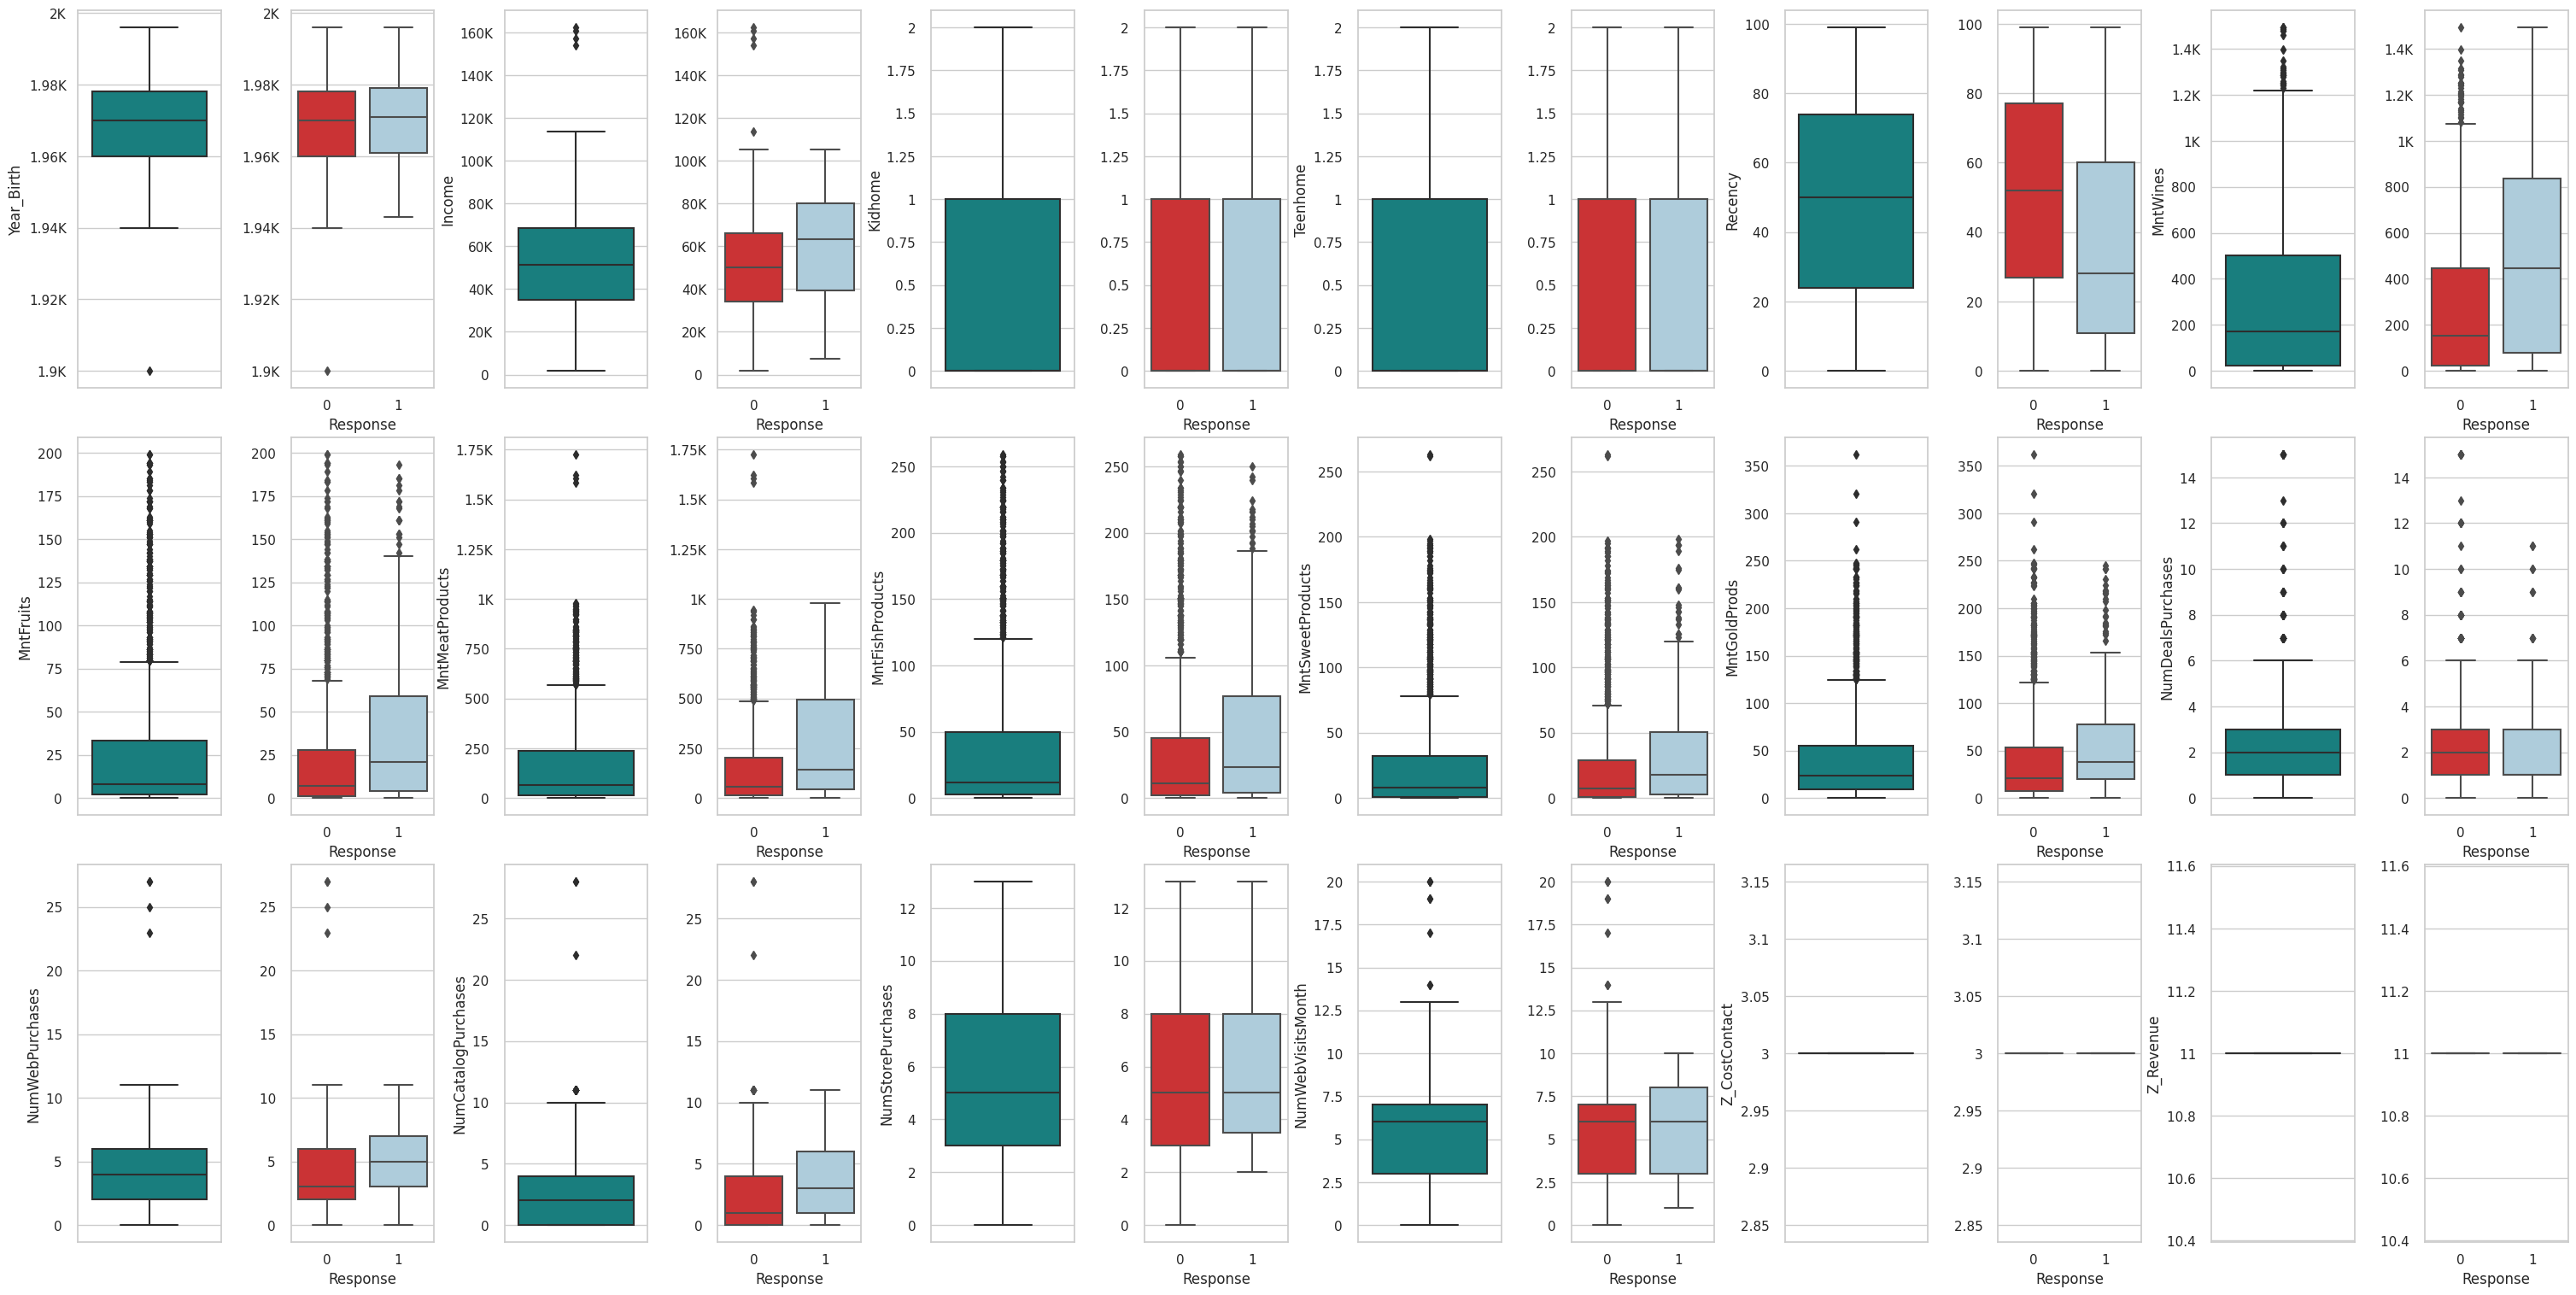

In [19]:
from math import log10, floor

# Funktion zur Anpassung der Achsenbeschriftung
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

# Erstellen von Boxplots zur Untersuchung von Ausreißern
plt.figure(figsize=(30, 15))
n = 3
j = 0
colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(num_cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+1)
    sns.boxplot(y=df_train[num_cols[j]], color='#088F8F', orient='v')

    ax2 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df_train["Response"], y=df_train[num_cols[j]], orient='v', palette=colors)

    ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

    ax2.set_ylabel(None)

    plt.tight_layout(pad=0.1)

    j+=1

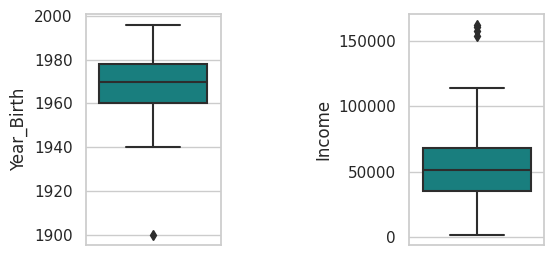

In [20]:
cols = ["Year_Birth","Income"]

# Erstellen von Boxplots für Spalten "Year_Birth" und "Income"
plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df_train[cols[j]], color='#088F8F', orient='v')

    j+=1

In [21]:
# Erzeugen deskriptiver Statistiken für 'Year_Birth' und 'Income' im Trainingsdatensatz
df_train[["Year_Birth", "Income"]].describe()

Year_Birth    Income
count        1680      1680
mean     1969.161 51727.447
std        11.796 21473.355
min          1900      1730
25%          1960     34916
50%          1970 51268.500
75%          1978 68379.500
max          1996    162397

In [22]:
print("Anzahl der Daten vor der Behandlung von Ausreißern:", df_train.shape[0])

# Entfernen von Ausreißern in "Year_Birth"
df_train = df_train[~(df_train["Year_Birth"] <= 1900)]

print("Anzahl der Daten nach der Behandlung von Ausreißern (Year_Birth) : {}".format(df_train.shape[0]))

Anzahl der Daten vor der Behandlung von Ausreißern: 1680
Anzahl der Daten nach der Behandlung von Ausreißern (Year_Birth) : 1679


In [23]:
# Generierung deskriptiver Statistiken für die Spalte "Year_Birth" im Trainingsdatensatz
df_train[["Year_Birth"]].describe()

Year_Birth
count        1679
mean     1969.202
std        11.678
min          1940
25%          1960
50%          1970
75%          1978
max          1996

In [24]:
# Zurücksetzen des Index des DataFrames, wobei der alte Index verworfen wird
df.reset_index(drop=True, inplace=True)

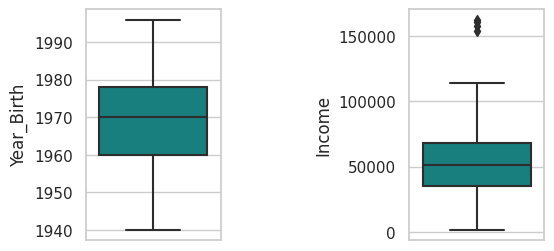

In [25]:
splt = ["Year_Birth","Income"]

# Festlegen der Figure-Größe und Vorbereitung zur Erstellung von Boxplots
plt.figure(figsize=(8, 3))
n = 1
j = 0
colors=["#e31a1c", "#a6cee3"]

# Erstellung von Boxplots für jede Spalte in der Liste 'splt'
for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(splt)*2/n), i+1)
    sns.boxplot(y=df_train[splt[j]], color='#088F8F', orient='v')

    j+=1

# **Feature Engineering**


In [26]:
# Zusammenführen von Trainings- und Testdatensätzen für Feature Engineering
# Dies ermöglicht eine einheitliche Bearbeitung, ohne Risiko des Data Leakages

# Kopieren und Markieren des Trainingsdatensatzes
df_tr = df_train.copy()
df_tr["dtype"] = "train"

df_te = df_test.copy()
df_te["dtype"] = "test"

# Zusammenführen der markierten Datensätze
df_all = pd.concat([df_tr, df_te]).reset_index(drop=True)

# Anzeigen der ersten fünf Zeilen des zusammengeführten DataFrame
df_all.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0   387        1976       Basic        Married    7500        0         0   
1  3537        1981  Graduation        Married   31089        1         0   
2  3075        1972         PhD        Married   59973        0         0   
3  4220        1970         PhD        Married   59892        0         1   
4  4472        1970         PhD       Divorced   35682        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13       59         6         16               11               11   
1  2012-08-17       57        31          3               31                2   
2  2013-11-09       47       130         30              168               20   
3  2013-02-11       26        73          0               13                0   
4  2014-06-27       34        23          0                8                6   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                 1            16                  1                2   
1                 8             4                  3                3   
2                34             0                  1                3   
3                 1             0                  1                2   
4                 2            18                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  4                  8             0   
2                    4                  7                  1             0   
3                    1                  3                  3             0   
4                    1                  3                  2             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  dtype  
0              3         11         0  train  
1              3         11         0  train  
2              3         11         0  train  
3              3         11         0  train  
4              3         11         0  train

In [27]:
# Erstellen einer Altersspalte basierend auf dem Referenzjahr 2014
currentYear = 2014 # Referenzjahr basierend auf den Daten : SAS Institute, 2014.
df_all['Age'] = currentYear - df_all['Year_Birth']

In [28]:
# Definition einer Funktion zur Klassifizierung des Alters in Altersgruppen
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young Adult'

    return grup

# Anwendung der Funktion auf die Spalte "Age", um die Spalte "Age_group" zu erstellen
df_all['Age_group'] = df_all["Age"].apply(lambda x: age_group(x))

In [29]:
# Erstellen der Spalte "Has_child", die angibt, ob mindestens ein Kind im Haushalt ist
df_all['Has_child'] = np.where(df_all["Kidhome"]+df_all["Teenhome"] > 0, 1, 0)

In [30]:
# Berechnung der Gesamtzahl der Abhängigen (Kinder und Teenager) eines Kunden
df_all['Dependents'] = df_all['Kidhome'] + df_all['Teenhome']

In [31]:
# Berechnung der "Lifetime" eines Kunden in Monaten seit dem ersten Einkauf bis 2014
df_all['Lifetime'] = (2014 - df_all["Dt_Customer"].dt.year)*12 + df_all["Dt_Customer"].dt.month

In [32]:
# Berechnung der Gesamtausgaben eines Kunden für alle Produktkategorien
df_all['Spending']=df_all['MntWines']+ \
    df_all['MntFruits']+ \
    df_all['MntMeatProducts']+ \
    df_all['MntFishProducts']+ \
    df_all['MntSweetProducts']+ \
    df_all['MntGoldProds']

In [33]:
# Berechnung der Gesamtzahl der Käufe eines Kunden über verschiedene Kanäle
df_all['Total_Purchases'] = df_all['NumDealsPurchases'] + \
    df_all['NumWebPurchases'] + \
    df_all['NumCatalogPurchases'] + \
    df_all['NumStorePurchases']

In [34]:
# Berechnung der Gesamtzahl der Reaktionen auf die fünf Marketingkampagnen
df_all['Total_Cmp']=df_all['AcceptedCmp1'].astype("int64")+ \
    df_all['AcceptedCmp2'].astype("int64")+ \
    df_all['AcceptedCmp3'].astype("int64")+ \
    df_all['AcceptedCmp4'].astype("int64")+ \
    df_all['AcceptedCmp5'].astype("int64")

In [35]:
# Feststellen, ob ein Kunde jemals mindestens eine Kampagne akzeptiert hat
df_all['Ever_Accept']=df_all['Total_Cmp'].apply(lambda x : 1 if x >= 1 else 0)

In [36]:
# Berechnung des Gesamtumsatzes basierend auf der Anzahl der akzeptierten Kampagnen und dem Umsatz pro Kampagne
df_all['Total_revenue'] = (df_all['Total_Cmp']) * df_all['Z_Revenue']

In [37]:
# Berechnung der Quartile für die Einkommenssegmentierung
Q1 = df_all["Income"].quantile(.25)
print(Q1)
Q3 = df_all["Income"].quantile(.75)
print(Q3)

# Definition der Funktion zur Einkommenssegmentierung
def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

# Anwendung der Segmentierungsfunktion auf die 'Income'-Spalte
df_all["Income_sgmt"] = df_all["Income"].fillna("None")
df_all["Income_sgmt"] = df_all["Income_sgmt"].apply(lambda x: income_sgmt(x))

35331.0
68487.0


In [38]:
# Auflisten der einzigartigen Werte in der Spalte "Income_sgmt"
df_all["Income_sgmt"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [39]:
# Berechnung der Web Conversion Rate als Verhältnis von Gesamtkäufen zu Website-Besuchen
df_all['Conversion_rate_web'] = np.round(df_all['Total_Purchases'] / df_all['NumWebVisitsMonth'], 2)

# Ersetzen von fehlenden Werten und unendlichen Werten durch Null
df_all['Conversion_rate_web'].fillna(0, inplace=True)
df_all['Conversion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

In [40]:
# Segmentierung der "Recency"-Werte in Kategorien basierend auf Quantilen
num_score = 5
rsg = pd.qcut(df_all['Recency'].unique(), num_score, labels=range(num_score, 0, -1))
rsg = pd.DataFrame({
    "value":df_all['Recency'].unique(),
    "score": rsg
})

# Erstellen und Anzeigen einer Tabelle mit Wertebereichen für jedes Quantil
rsg.groupby(['score'])[['value']] \
    .agg(['min', 'max']).sort_index(ascending=False) \
    .style.background_gradient(cmap='Greens')

In [41]:
# Definition eines Dictionaries mit Schwellenwerten für die "Recency"-Segmentierung
divided = {5: 19, 4: 39, 3: 59, 2: 79}

# Funktion zur Zuweisung eines Segmentierungsscores basierend auf 'Recency'
def RScore(x,d):
    if x <= d[5]:
        return 4
    elif x <= d[4]:
        return 3
    elif x <= d[3]:
        return 2
    elif x <= d[2]:
        return 1
    else:
        return 0

# Anwendung der Segmentierungsfunktion auf die "Recency"-Spalte
df_all['Recency_sgmt'] = df_all['Recency'].apply(lambda x: RScore(x, divided))

# Aggregieren und Anzeigen der Verteilung der "Recency"-Werte über die Segmente
df_all.groupby(['Recency_sgmt'])[['Recency']].agg(['min', 'max', 'count']).style.background_gradient(cmap='Greens')

In [42]:
df_all.sample(5)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
449   5763        1972      Master        Married   49854        1         0   
877   2874        1988      Master       Divorced   35388        1         0   
672   5493        1976  Graduation        Married   39356        1         1   
1473  8135        1986      Master        Married   27161        1         0   
1464  9235        1957  Graduation         Single   34916        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
449   2013-10-11       63       123         17              171   
877   2013-07-03       20         6          4                7   
672   2014-03-19       21        15          0                2   
1473  2013-10-28       41         7          4               23   
1464  2014-05-27       45         7          0                8   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
449                39                 0            30                  5   
877                 4                 3             8                  1   
672                 0                 0             6                  1   
1473                7                 0            11                  1   
1464                2                 0             1                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
449                 6                    2                  5   
877                 1                    0                  3   
672                 1                    0                  2   
1473                1                    0                  3   
1464                1                    0                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
449                   6             0             0             0   
877                   7             0             0             0   
672                   6             1             0             0   
1473                  7             0             0             0   
1464                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
449              0             0         0              3         11   
877              0             0         0              3         11   
672              0             0         0              3         11   
1473             0             0         0              3         11   
1464             0             0         0              3         11   

      Response  dtype  Age     Age_group  Has_child  Dependents  Lifetime  \
449          0  train   42         Adult          1           1        22   
877          0  train   26   Young Adult          1           1        19   
672          0  train   38         Adult          1           2         3   
1473         0  train   28   Young Adult          1           1        22   
1464         0  train   57  Senior Adult          1           2         5   

      Spending  Total_Purchases  Total_Cmp  Ever_Accept  Total_revenue  \
449        380               18          0            0              0   
877         32                5          0            0              0   
672         23                4          1            1             11   
1473        52                5          0            0              0   
1464        18                4          0            0              0   

     Income_sgmt  Conversion_rate_web  Recency_sgmt  
449       Medium                    3             1  
877       Medium                0.710             3  
672       Medium                0.670             3  
1473         Low                0.710             2  
1464         Low                0.570             2

In [43]:
cat_str = ['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']
cat_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
           'Ever_Accept', 'Complain', 'Response', 'Has_child', 'Recency_sgmt']

num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Dependents', 'Lifetime', 'Spending',
       'Total_Purchases', 'NumWebVisitsMonth', 'Conversion_rate_web',
       'Total_Cmp', 'Total_revenue']

num_one = ['Z_CostContact', 'Z_Revenue']

num_product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

timestamp = ["Dt_Customer"]

In [44]:
# Zusammenstellung aller Spaltennamen aus den verschiedenen Kategorien
allcol = cat_str + cat_int + num + num_one + num_product + num_purchases + timestamp

# Überprüfen, ob Spalten in df_all nicht in der zusammengesetzten Liste allcol enthalten sind
for i in df_all:
    if i not in allcol:
        print(i)

dtype


In [45]:
# Neue Spaltenreihenfolge erstellen, wobei "Response" am Ende positioniert wird
new_cols = list(df_all.columns.values)
new_cols.remove("Response")
new_cols.append("Response")

# Erstellen einer Kopie von df_all mit der neuen Spaltenreihenfolge
df_all = df_all[new_cols].copy()

In [46]:
df_all.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'dtype',
       'Age', 'Age_group', 'Has_child', 'Dependents', 'Lifetime', 'Spending',
       'Total_Purchases', 'Total_Cmp', 'Ever_Accept', 'Total_revenue',
       'Income_sgmt', 'Conversion_rate_web', 'Recency_sgmt', 'Response'],
      dtype='object')

In [47]:
# Trennen des kombinierten DataFrame zurück in Trainings- und Testdatensätze

# Extrahieren und Kopieren des Trainingsdatensatzes aus df_all
df_train = df_all[df_all["dtype"] == "train"].copy()
df_train.drop("dtype", axis=1, inplace=True) # Entfernen der "dtype"-Spalte
df_train.reset_index(drop=True, inplace=True) # Zurücksetzen des Index

# Extrahieren und Kopieren des Testdatensatzes aus df_all
df_test = df_all[df_all["dtype"] == "test"].copy()
df_test.drop("dtype", axis=1, inplace=True) # Entfernen der "dtype"-Spalte
df_test.reset_index(drop=True, inplace=True) # Zurücksetzen des Index

# **Feature Transformation**

In [48]:
# Berechnung und Klassifizierung der Verteilungstypen für numerische Spalten im Trainingsdatensatz
# Initialisierung von Listen für Schiefe, Kurtosis und Verteilungstyp
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

# Durchlaufen jeder numerischen Spalte zur Berechnung der Schiefe und Kurtosis
for column in num_cols:
    data = df_train[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)


    # Bestimmung des Verteilungstyps basierend auf Schiefe und Mittelwert, Median, Modus
    # Verschiedene Kategorien für die Verteilungstypen
    # Hinzufügen der berechneten Werte und Typen zu den Listen
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

# Erstellung eines DataFrame zur Darstellung der Verteilungstypen
dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})


# Anpassung der Verteilungstypen für spezifische Spalten und Sortierung des DataFrame
dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist = dist.sort_values(["Type of Distribution","Column Name"]).reset_index(drop=True)
dist

Column Name  Skewness  Kurtosis  \
0               Kidhome     0.624    -0.794   
1              Teenhome     0.442    -0.918   
2       MntFishProducts     1.921     3.072   
3             MntFruits     2.135     4.236   
4          MntGoldProds     1.925     3.755   
5       MntMeatProducts     2.079     5.503   
6      MntSweetProducts     2.184     4.713   
7              MntWines     1.179     0.632   
8   NumCatalogPurchases     1.891     8.297   
9     NumDealsPurchases     2.528     9.902   
10      NumWebPurchases     1.549     6.927   
11               Income     0.264     0.381   
12    NumWebVisitsMonth     0.351     2.385   
13    NumStorePurchases     0.697    -0.609   
14              Recency    -0.004    -1.206   
15           Year_Birth    -0.116    -0.749   
16        Z_CostContact       NaN       NaN   
17            Z_Revenue       NaN       NaN   

                          Type of Distribution  
0                         Bimodal Distribution  
1                         Bimodal Distribution  
2                     Highly Positively Skewed  
3                     Highly Positively Skewed  
4                     Highly Positively Skewed  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11  Moderately Normal Distribution (Symmetric)  
12  Moderately Normal Distribution (Symmetric)  
13                Moderately Positively Skewed  
14             Normal Distribution (Symmetric)  
15             Normal Distribution (Symmetric)  
16                        Uniform Distribution  
17                        Uniform Distribution

In [49]:
ft_cols = ['Conversion_rate_web', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'Spending', 'Total_revenue', 'Age', 'Income', 'Lifetime', 'NumWebVisitsMonth', 'Recency', 'Total_Purchases', 'Year_Birth']

Logarithmustransformation

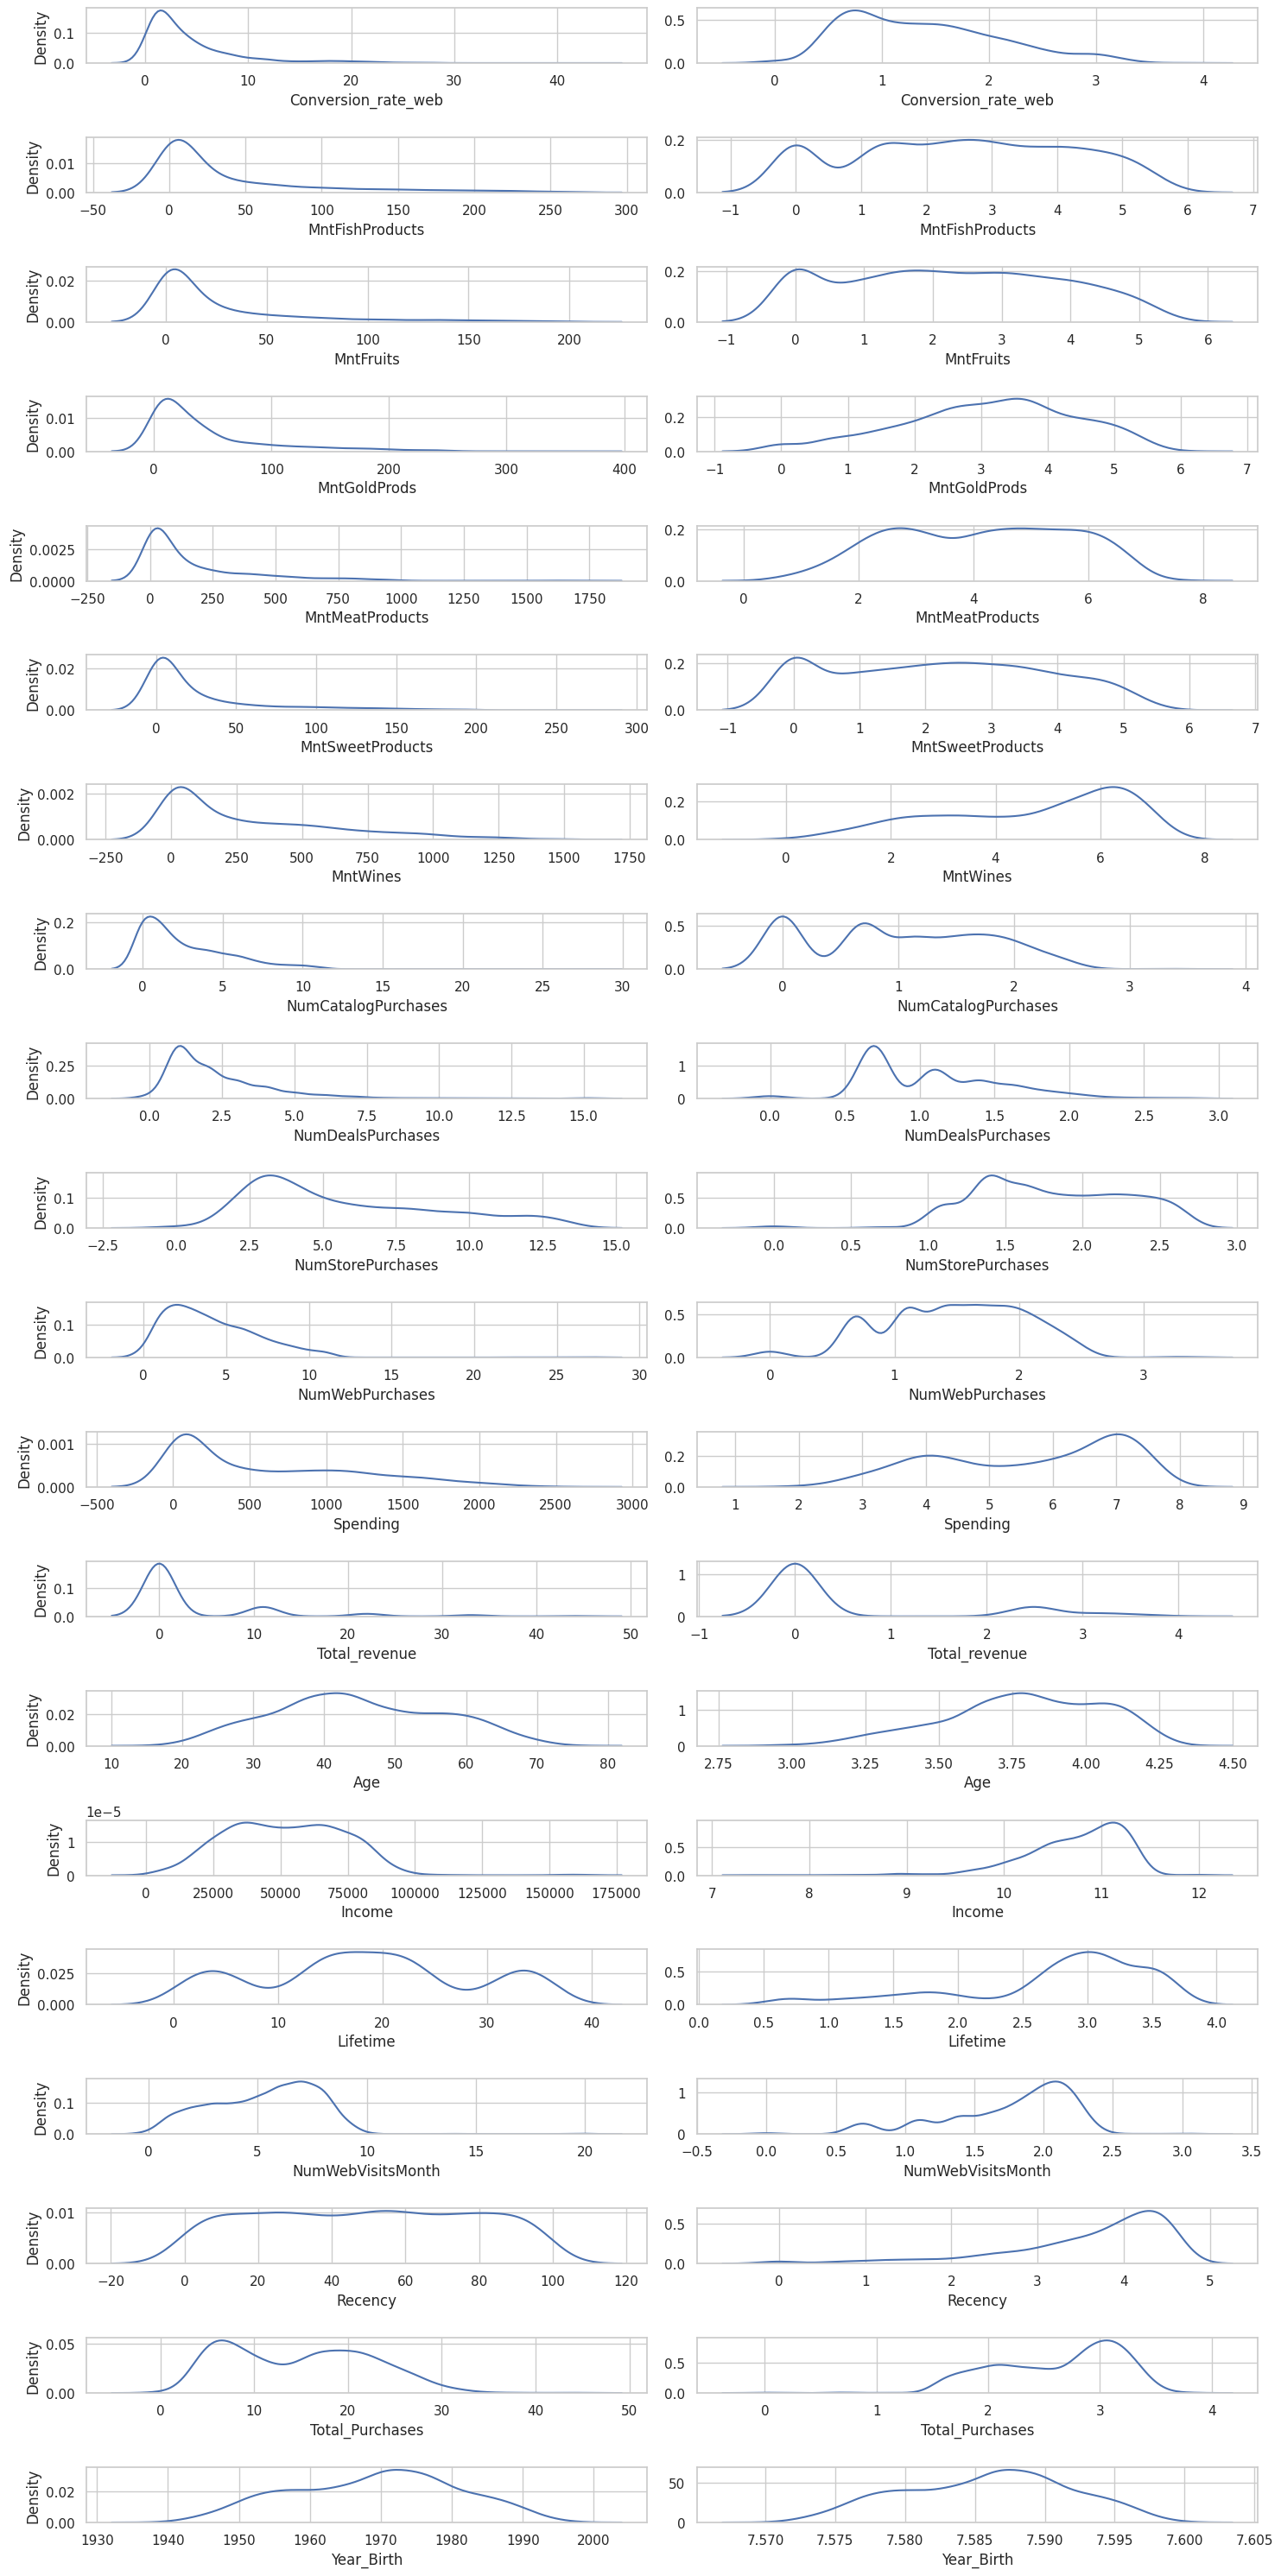

In [50]:
# Erstellen von KDE-Plots für Spalten, die für die Logarithmustransformation geeignet sind
fig, ax = plt.subplots(len(ft_cols),2,figsize=(15,30))
for i in range(0,len(ft_cols)):
    # KDE-Plot für die ursprüngliche Verteilung
    kde1 = sns.kdeplot(df_train[ft_cols[i]], ax=ax[i][0])

    # KDE-Plot für die Verteilung nach der Logarithmustransformation
    kde2 = sns.kdeplot(np.log(df_train[ft_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

Box-cox transformation

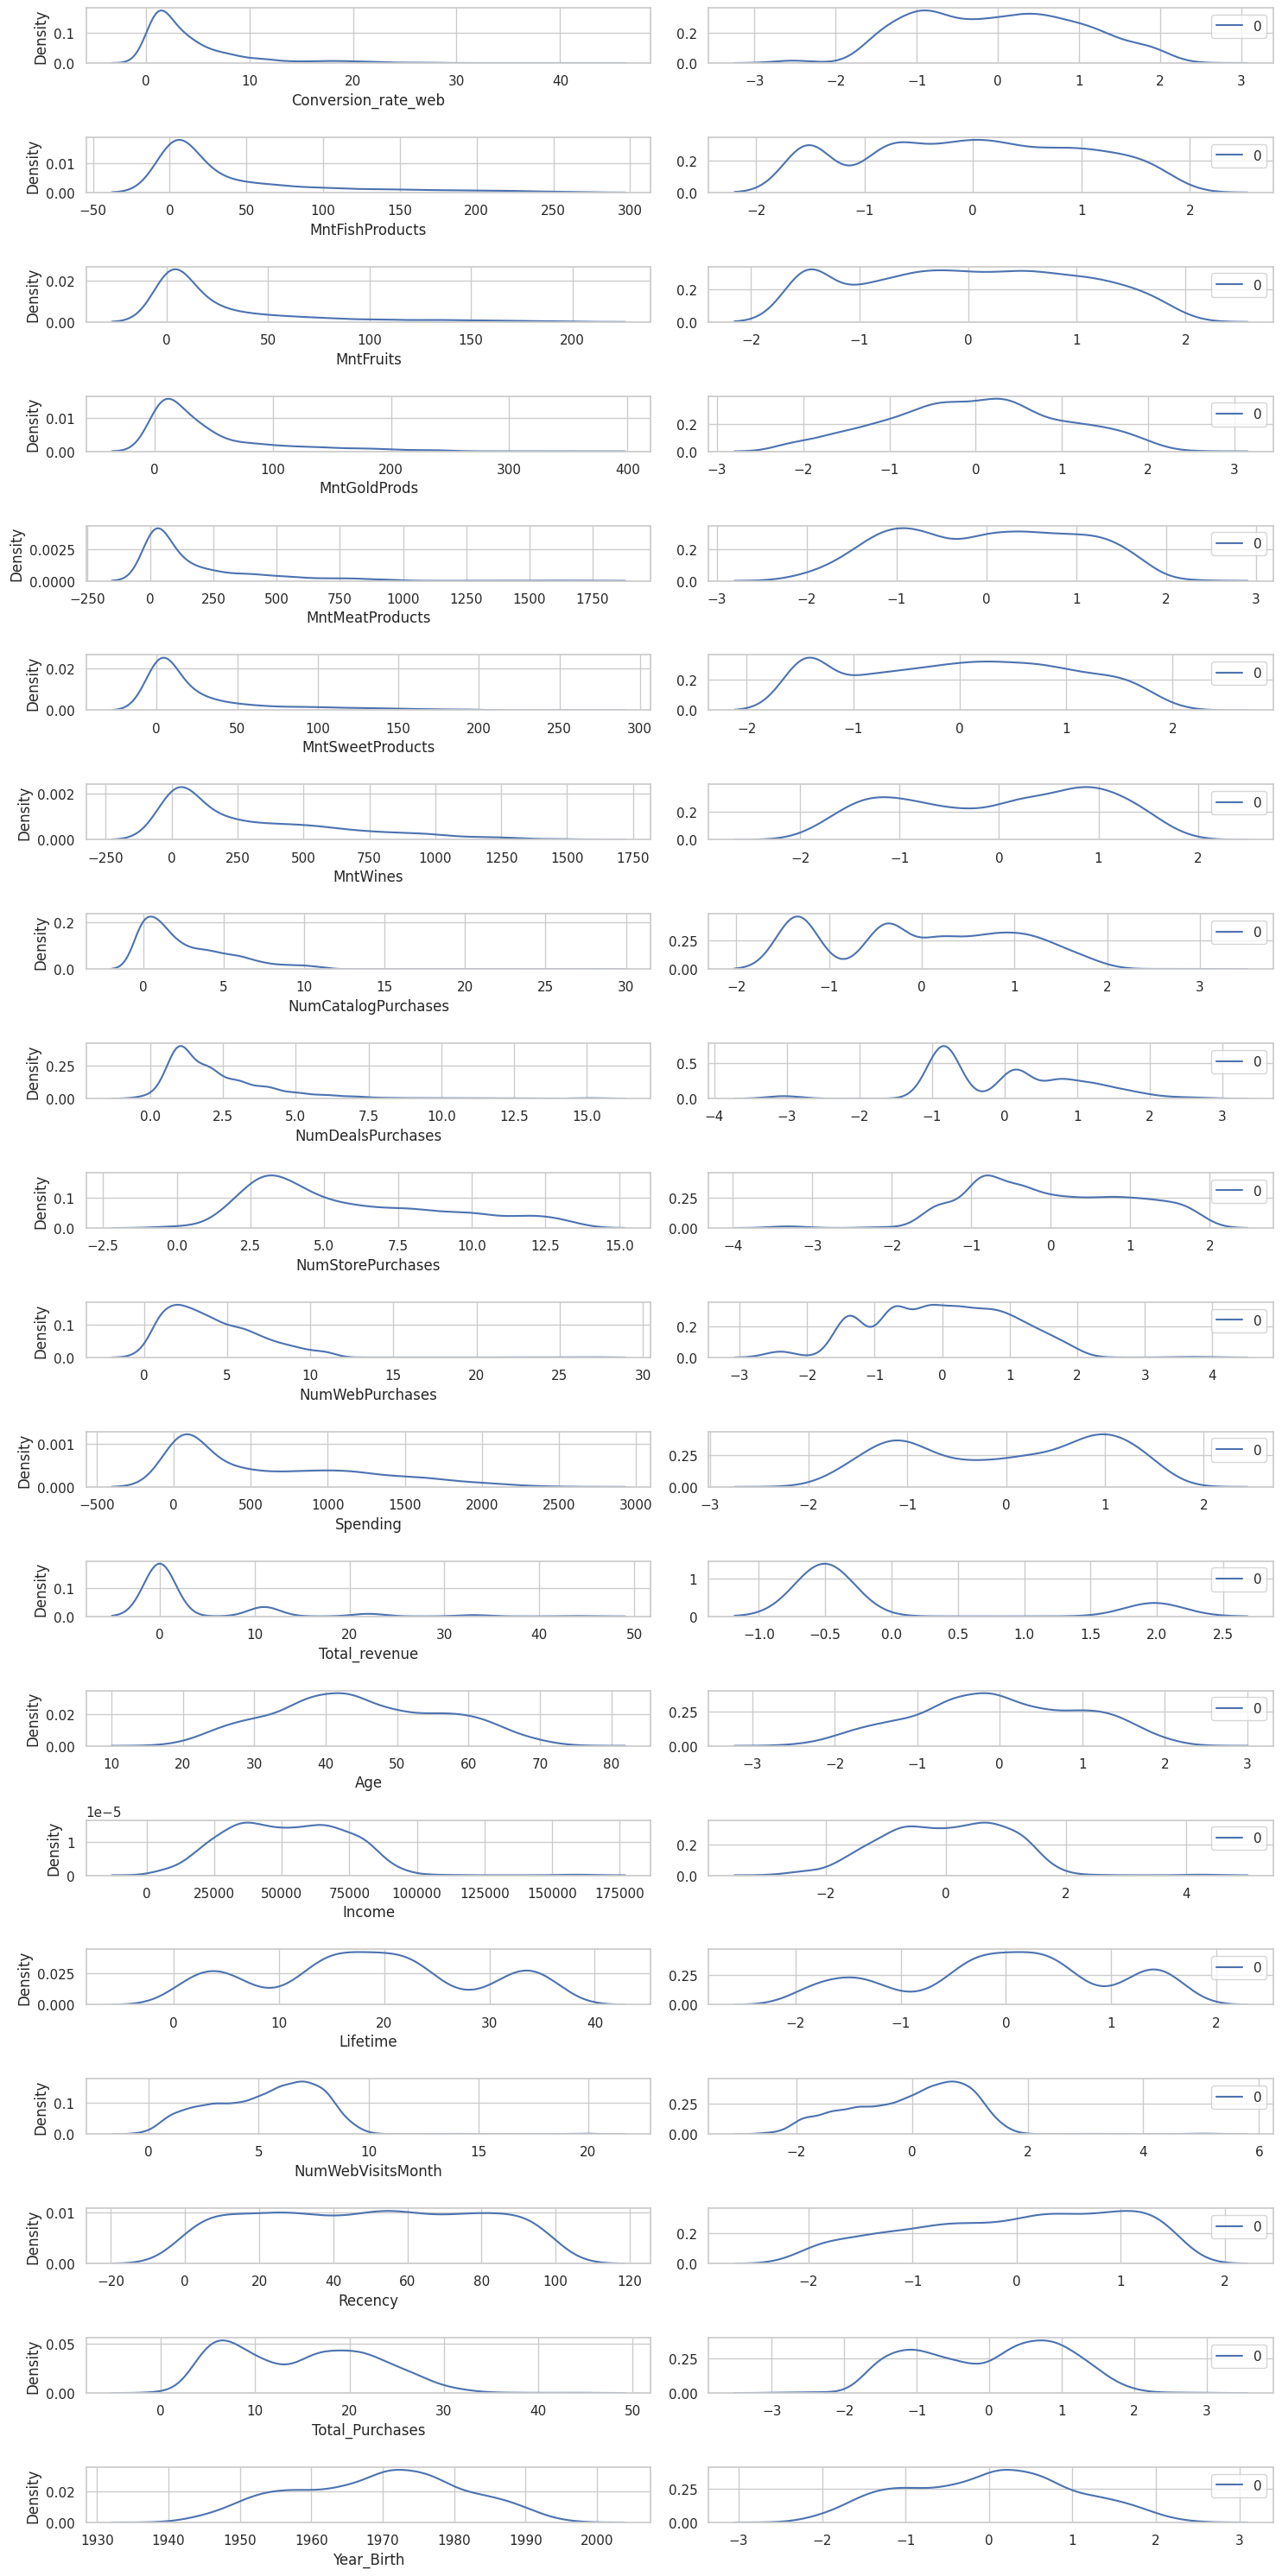

In [51]:
from sklearn.preprocessing import PowerTransformer

# Erstellen von KDE-Plots für Spalten vor und nach der Anwendung der Box-Cox-Transformation
fig, ax = plt.subplots(len(ft_cols),2,figsize=(15,30))
for i in range(0,len(ft_cols)):
    # Anwenden der Box-Cox-Transformation
    pt = PowerTransformer(method='box-cox')
    data = pt.fit_transform(df_train[[ft_cols[i]]]+1)

    # KDE-Plot für die ursprüngliche Verteilung
    kde1 = sns.kdeplot(df_train[ft_cols[i]], ax=ax[i][0])

    # KDE-Plot für die Verteilung nach der Transformation
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

Yeo-Johnson Transformation

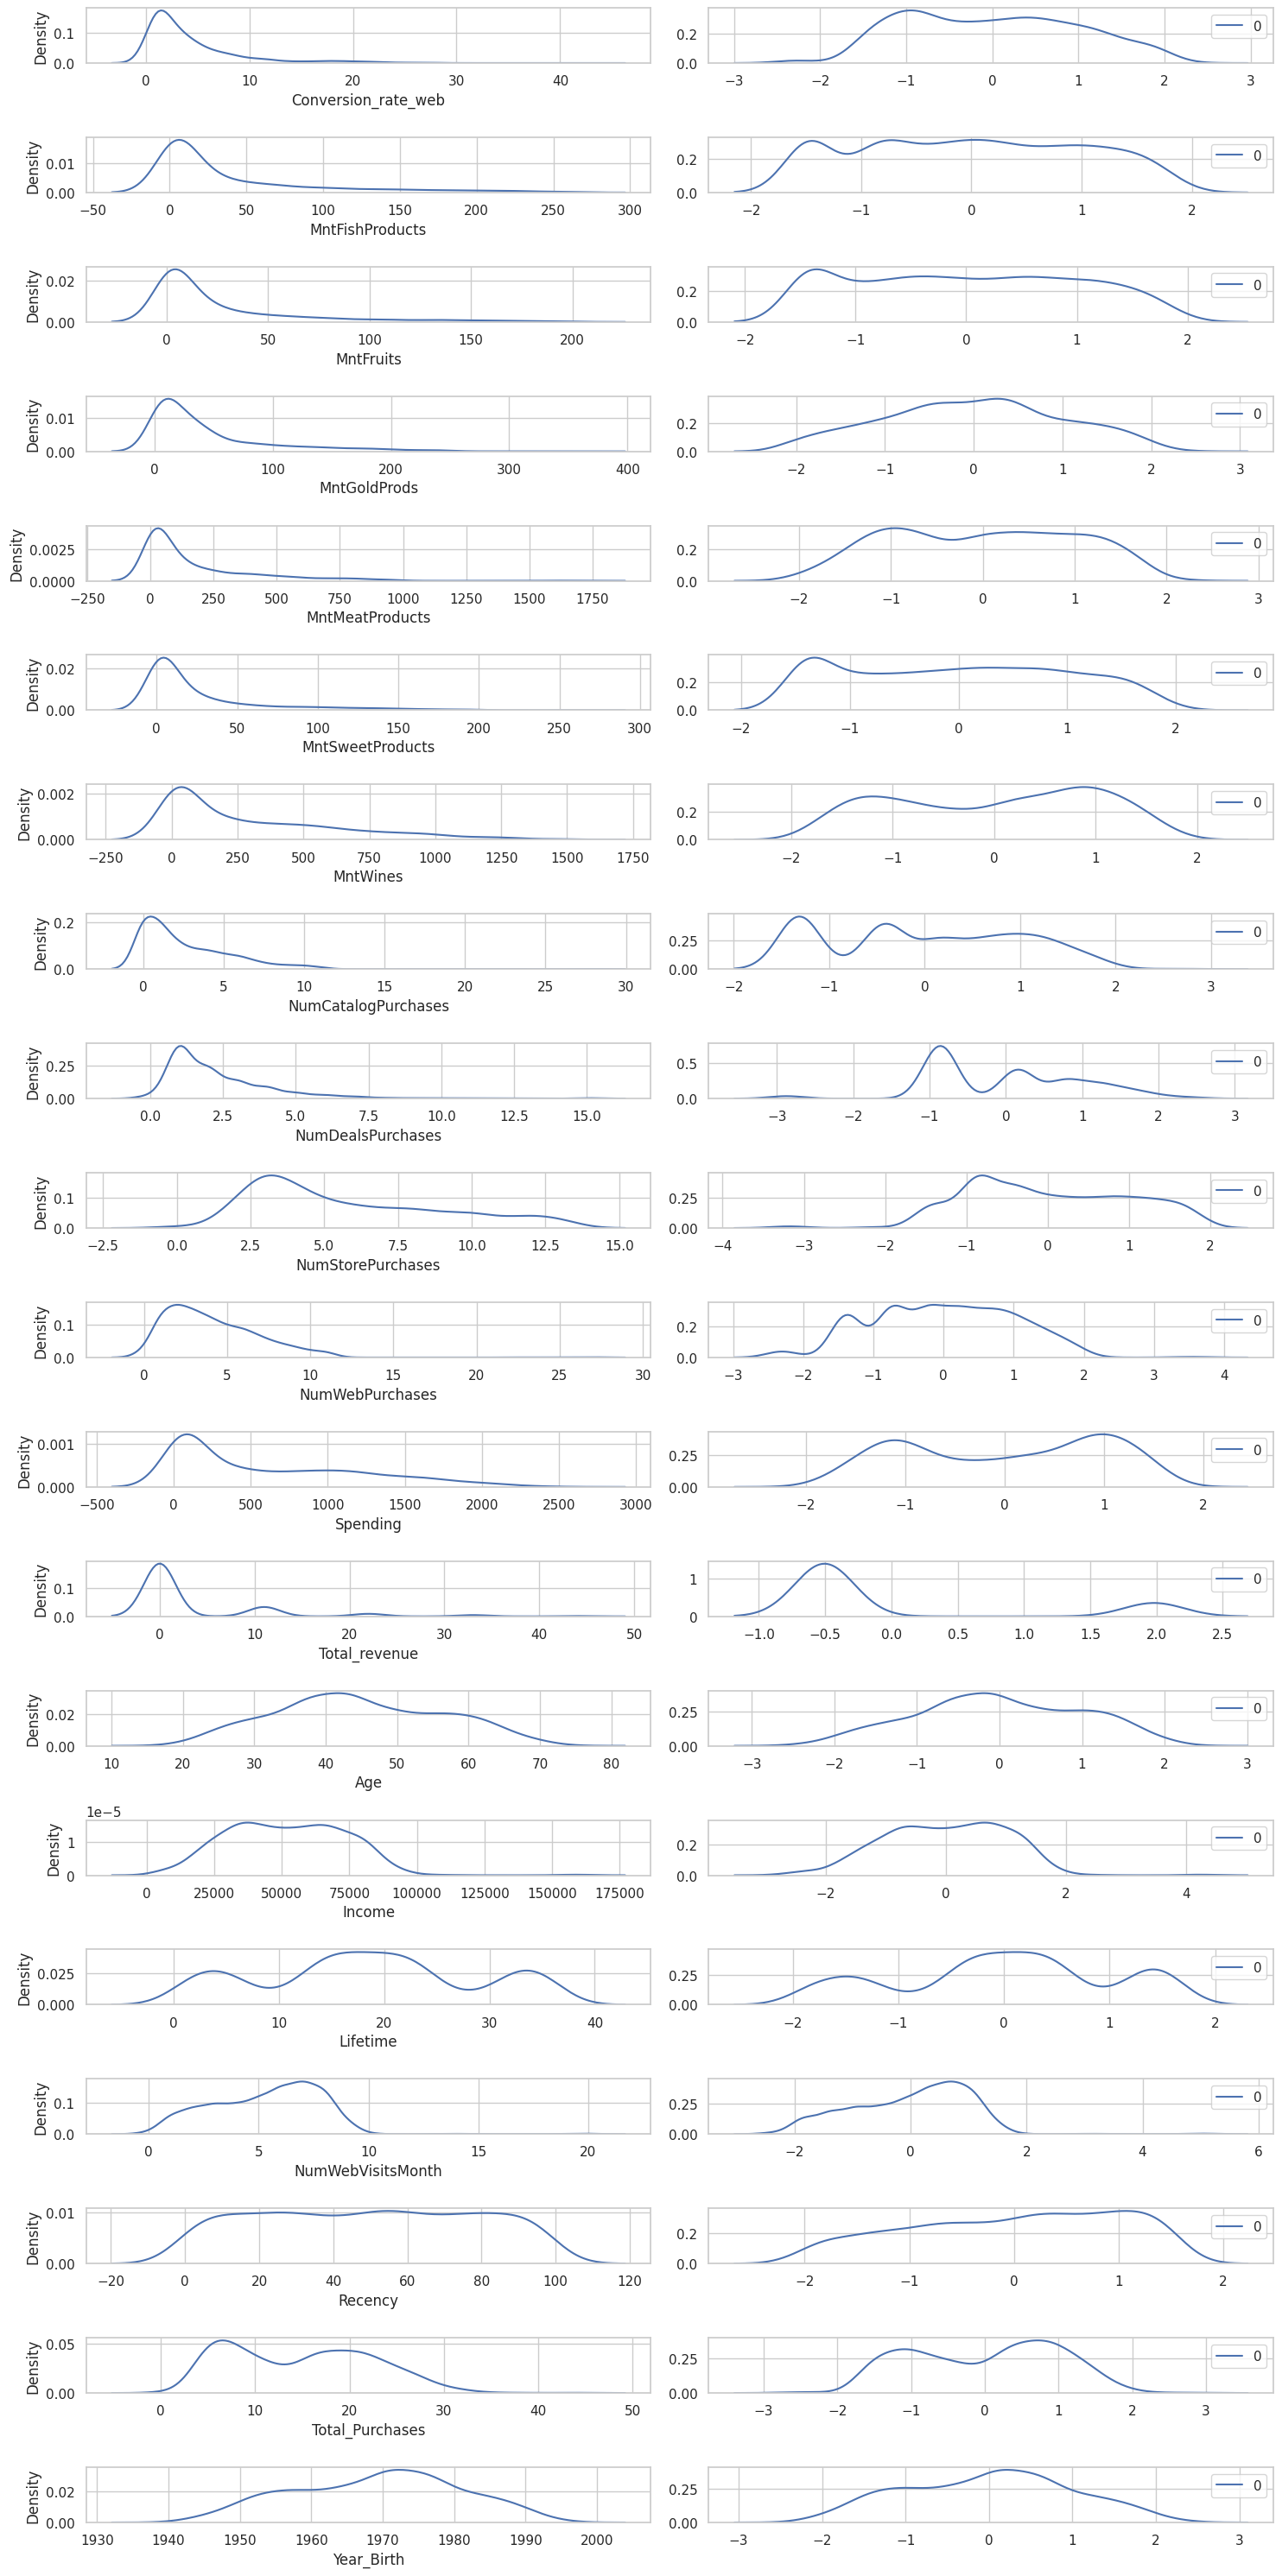

In [52]:
from sklearn.preprocessing import PowerTransformer

# Erstellen von KDE-Plots für Spalten vor und nach der Anwendung der Yeo-Johnson-Transformation
fig, ax = plt.subplots(len(ft_cols),2,figsize=(15,30))
for i in range(0,len(ft_cols)):

    # Anwenden der Yeo-Johnson-Transformation
    pt = PowerTransformer(method='yeo-johnson')
    data = pt.fit_transform(df_train[[ft_cols[i]]]+1)

    # KDE-Plot für die ursprüngliche Verteilung
    kde1 = sns.kdeplot(df_train[ft_cols[i]], ax=ax[i][0])

    # KDE-Plot für die Verteilung nach der Transformation
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [53]:
# Anwendung der Yeo-Johnson-Transformation auf ausgewählte Spalten im Trainingsdatensatz
pt = PowerTransformer(method='yeo-johnson')
df_train[ft_cols] = pt.fit_transform(df_train[ft_cols])

# Anzeigen deskriptiver Statistiken der transformierten Spalten
df_train[ft_cols].describe()

Conversion_rate_web  MntFishProducts  MntFruits  MntGoldProds  \
count                 1679             1679       1679          1679   
mean                -0.000           -0.000      0.000        -0.000   
std                  1.000            1.000      1.000         1.000   
min                 -2.568           -1.520     -1.472        -2.117   
25%                 -0.843           -0.710     -0.728        -0.676   
50%                 -0.022           -0.005     -0.009         0.011   
75%                  0.762            0.831      0.829         0.676   
max                  2.397            1.854      1.893         2.474   

       MntMeatProducts  MntSweetProducts  MntWines  NumCatalogPurchases  \
count             1679              1679      1679                 1679   
mean             0.000             0.000    -0.000                0.000   
std              1.000             1.000     1.000                1.000   
min             -2.122            -1.435    -1.981               -1.340   
25%             -0.850            -0.971    -0.913               -1.340   
50%              0.033             0.002     0.125                0.158   
75%              0.851             0.806     0.878                0.808   
max              2.228             2.027     1.821                2.834   

       NumDealsPurchases  NumStorePurchases  NumWebPurchases  Spending  \
count               1679               1679             1679      1679   
mean               0.000             -0.000            0.000    -0.000   
std                1.000              1.000            1.000     1.000   
min               -3.040             -3.302           -2.394    -2.071   
25%               -0.837             -0.854           -0.717    -0.975   
50%                0.148             -0.045            0.177     0.126   
75%                0.738              0.810            0.810     0.921   
max                2.668              1.798            3.842     1.765   

       Total_revenue    Age  Income  Lifetime  NumWebVisitsMonth  Recency  \
count           1679   1679    1679      1679               1679     1679   
mean           0.000  0.000   0.000     0.000             -0.000   -0.000   
std            1.000  1.000   1.000     1.000              1.000    1.000   
min           -0.505 -2.534  -2.845    -1.899             -2.393   -2.033   
25%           -0.505 -0.732  -0.751    -0.468             -0.936   -0.788   
50%           -0.505 -0.027   0.034     0.026              0.297    0.128   
75%           -0.505  0.801   0.791     0.583              0.682    0.854   
max            2.005  2.326   4.353     1.617              5.127    1.542   

       Total_Purchases  Year_Birth  
count             1679        1679  
mean             0.000      -0.000  
std              1.000       1.000  
min             -2.834      -2.370  
25%             -0.861      -0.800  
50%              0.141       0.042  
75%              0.837       0.743  
max              2.885       2.420

In [54]:
# Anwendung der Yeo-Johnson-Transformation auf die entsprechenden Spalten im Testdatensatz
df_test[ft_cols] = pt.transform(df_test[ft_cols])

# Anzeigen deskriptiver Statistiken der transformierten Spalten im Testdatensatz
df_test[ft_cols].describe()

Conversion_rate_web  MntFishProducts  MntFruits  MntGoldProds  \
count                  560              560        560           560   
mean                 0.032           -0.034     -0.026         0.025   
std                  1.000            1.002      1.032         0.970   
min                 -2.568           -1.520     -1.472        -2.117   
25%                 -0.778           -0.710     -0.999        -0.676   
50%                 -0.018           -0.029     -0.009         0.026   
75%                  0.749            0.780      0.810         0.725   
max                  2.141            1.852      1.887         2.085   

       MntMeatProducts  MntSweetProducts  MntWines  NumCatalogPurchases  \
count              560               560       560                  560   
mean            -0.036             0.015     0.002                0.014   
std              1.012             1.019     1.021                1.033   
min             -2.515            -1.435    -1.981               -1.340   
25%             -0.887            -0.971    -0.931               -1.340   
50%              0.005             0.002     0.139                0.158   
75%              0.791             0.926     0.888                0.808   
max              2.228             1.860     1.801                2.834   

       NumDealsPurchases  NumStorePurchases  NumWebPurchases  Spending  \
count                560                560              560       560   
mean              -0.046              0.030           -0.053    -0.012   
std                1.027              0.989            0.988     1.017   
min               -3.040             -3.302           -2.394    -1.923   
25%               -0.837             -0.854           -0.717    -1.035   
50%                0.148             -0.045           -0.223     0.131   
75%                0.738              0.810            0.810     0.906   
max                2.533              1.798            1.904     1.765   

       Total_revenue    Age  Income  Lifetime  NumWebVisitsMonth  Recency  \
count            560    560     560       560                560      560   
mean           0.037  0.121   0.076    -0.087             -0.052    0.000   
std            1.027  1.045   1.259     0.971              0.932    0.976   
min           -0.505 -2.423  -2.354    -1.899             -2.393   -2.033   
25%           -0.505 -0.552  -0.658    -0.676             -0.510   -0.749   
50%           -0.505  0.058   0.045    -0.022              0.297    0.095   
75%           -0.505  0.960   0.807     0.492              0.682    0.854   
max            2.005  5.477  18.479     1.617              1.427    1.542   

       Total_Purchases  Year_Birth  
count              560         560  
mean            -0.005      -0.122  
std              1.025       1.048  
min             -2.834      -5.526  
25%             -1.032      -0.964  
50%              0.141      -0.044  
75%              0.837       0.566  
max              2.079       2.323

In [55]:
df_train.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0   387       0.566       Basic        Married  -2.354        0         0   
1  3537       1.013  Graduation        Married  -0.947        1         0   
2  3075       0.215         PhD        Married   0.425        0         0   
3  4220       0.042         PhD        Married   0.421        0         1   
4  4472       0.042         PhD       Divorced  -0.713        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13    0.410    -1.414      0.396           -1.063           -0.054   
1  2012-08-17    0.348    -0.802     -0.537           -0.456           -0.880   
2  2013-11-09    0.030    -0.052      0.772            0.620            0.286   
3  2013-02-11   -0.710    -0.380     -1.472           -0.969           -1.520   
4  2014-06-27   -0.413    -0.931     -1.472           -1.238           -0.377   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -0.971        -0.287             -0.837           -0.717   
1             0.002        -1.150              0.738           -0.223   
2             0.842        -2.117             -0.837           -0.223   
3            -0.971        -2.117             -0.837           -0.717   
4            -0.704        -0.202             -0.837           -1.373   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              1.059             0   
1               -1.340             -0.414              1.059             0   
2                0.808              0.557             -1.863             0   
3               -0.378             -0.854             -0.936             0   
4               -0.378             -0.854             -1.384             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age Age_group  Has_child  Dependents  Lifetime  \
0              3         11 -0.552     Adult          0           0     1.534   
1              3         11 -1.009     Adult          1           1     1.282   
2              3         11 -0.199     Adult          0           0     0.492   
3              3         11 -0.027     Adult          1           1    -0.367   
4              3         11 -0.027     Adult          1           1    -1.235   

   Spending  Total_Purchases  Total_Cmp  Ever_Accept  Total_revenue  \
0    -1.052           -1.214          0            0         -0.505   
1    -0.913           -0.545          0            0         -0.505   
2     0.100            0.141          0            0         -0.505   
3    -0.859           -1.032          0            0         -0.505   
4    -1.087           -1.214          0            0         -0.505   

  Income_sgmt  Conversion_rate_web  Recency_sgmt  Response  
0         Low               -1.296             2         0  
1         Low               -0.810             2         0  
2      Medium                1.694             2         0  
3      Medium               -0.143             3         0  
4      Medium                0.135             3         0

## **Kodierung kategorischer Merkmale**


In [56]:
# Ausgabe der einzigartigen Werte für jede kategoriale Spalte in 'cat_str'
for x in cat_str:
    unq = list(df_all[x].unique())
    sorted(unq)  # Sortieren der einzigartigen Werte

    print(f'===== {x} =====')

    # Beschränkung der Anzeige auf die ersten 10 Werte, wenn mehr als 10 einzigartige Werte vorhanden sind
    if len(unq) >= 10:
        unq = list(unq[:10]) + ['.....']
        print(f'{unq}')
    else:
        print(f'{unq}')
    print()

===== Education =====
['Basic', 'Graduation', 'PhD', 'Master']

===== Marital_Status =====
['Married', 'Divorced', 'Single']

===== Age_group =====
['Adult', 'Senior Adult', 'Young Adult']

===== Income_sgmt =====
['Low', 'Medium', 'High']



Label Encoding

In [57]:
# Zuordnung von numerischen Werten zu Bildungsstufen in den Trainings- und Testdatensätzen
map_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3
}

# Umwandlung der "Education"-Spalte in Trainingsdatensatz
df_train['Education'] = df_train['Education'].map(map_education)
print("Education (Train) = ", np.sort(df_train['Education'].unique()))

# Umwandlung der "Education"-Spalte in Testdatensatz
df_test['Education'] = df_test['Education'].map(map_education)
print("Education (Test) = ", np.sort(df_test['Education'].unique()))

Education (Train) =  [0 1 2 3]
Education (Test) =  [0 1 2 3]


In [58]:
# Zuordnung von numerischen Werten zu Altersgruppen in den Trainings- und Testdatensätzen
map_age = {
    'Young Adult' : 0,
    'Adult' : 1,
    'Senior Adult' : 2
}

# Umwandlung der 'Age_group'-Spalte im Trainingsdatensatz
df_train['Age_group'] = df_train['Age_group'].map(map_age)
print("Age_group (Train) = ", np.sort(df_train['Age_group'].unique()))

# Umwandlung der 'Age_group'-Spalte im Testdatensatz
df_test['Age_group'] = df_test['Age_group'].map(map_age)
print("Age_group (Test) = ", np.sort(df_test['Age_group'].unique()))

Age_group (Train) =  [0 1 2]
Age_group (Test) =  [0 1 2]


In [59]:
# Zuordnung von numerischen Werten zu Einkommenssegmenten in den Trainings- und Testdatensätzen
map_income = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}

# Umwandlung der 'Income_sgmt'-Spalte im Trainingsdatensatz
df_train['Income_sgmt'] = df_train['Income_sgmt'].map(map_income)
print("Income_sgmt (Train) = ", np.sort(df_train['Income_sgmt'].unique()))

# Umwandlung der 'Income_sgmt'-Spalte im Testdatensatz
df_test['Income_sgmt'] = df_test['Income_sgmt'].map(map_income)
print("Income_sgmt (Test) = ", np.sort(df_test['Income_sgmt'].unique()))

Income_sgmt (Train) =  [0 1 2]
Income_sgmt (Test) =  [0 1 2]


In [60]:
df_train.head()

ID  Year_Birth  Education Marital_Status  Income  Kidhome  Teenhome  \
0   387       0.566          0        Married  -2.354        0         0   
1  3537       1.013          1        Married  -0.947        1         0   
2  3075       0.215          3        Married   0.425        0         0   
3  4220       0.042          3        Married   0.421        0         1   
4  4472       0.042          3       Divorced  -0.713        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13    0.410    -1.414      0.396           -1.063           -0.054   
1  2012-08-17    0.348    -0.802     -0.537           -0.456           -0.880   
2  2013-11-09    0.030    -0.052      0.772            0.620            0.286   
3  2013-02-11   -0.710    -0.380     -1.472           -0.969           -1.520   
4  2014-06-27   -0.413    -0.931     -1.472           -1.238           -0.377   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -0.971        -0.287             -0.837           -0.717   
1             0.002        -1.150              0.738           -0.223   
2             0.842        -2.117             -0.837           -0.223   
3            -0.971        -2.117             -0.837           -0.717   
4            -0.704        -0.202             -0.837           -1.373   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              1.059             0   
1               -1.340             -0.414              1.059             0   
2                0.808              0.557             -1.863             0   
3               -0.378             -0.854             -0.936             0   
4               -0.378             -0.854             -1.384             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age  Age_group  Has_child  Dependents  \
0              3         11 -0.552          1          0           0   
1              3         11 -1.009          1          1           1   
2              3         11 -0.199          1          0           0   
3              3         11 -0.027          1          1           1   
4              3         11 -0.027          1          1           1   

   Lifetime  Spending  Total_Purchases  Total_Cmp  Ever_Accept  Total_revenue  \
0     1.534    -1.052           -1.214          0            0         -0.505   
1     1.282    -0.913           -0.545          0            0         -0.505   
2     0.492     0.100            0.141          0            0         -0.505   
3    -0.367    -0.859           -1.032          0            0         -0.505   
4    -1.235    -1.087           -1.214          0            0         -0.505   

   Income_sgmt  Conversion_rate_web  Recency_sgmt  Response  
0            0               -1.296             2         0  
1            0               -0.810             2         0  
2            1                1.694             2         0  
3            1               -0.143             3         0  
4            1                0.135             3         0

In [61]:
df_test.head()

ID  Year_Birth  Education Marital_Status  Income  Kidhome  Teenhome  \
0  10146       0.215          3        Married  -0.554        1         0   
1      1      -0.718          1         Single   0.297        0         0   
2   7875      -1.682          1        Married   0.944        0         0   
3   7807       0.389          1        Married  -0.259        0         1   
4   4268      -0.882          1        Married   0.119        0         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2014-02-03   -1.077    -0.896     -0.999           -0.969           -1.520   
1  2014-06-15   -2.033     0.815     -0.271           -0.005           -0.297   
2  2014-04-29   -0.002     1.421     -1.472            1.502            0.740   
3  2012-12-09   -0.710    -0.217     -1.472            0.319            0.819   
4  2014-09-06    0.128    -0.057     -1.472           -0.691           -1.520   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -1.435        -1.295             -0.837           -1.373   
1            -1.435         0.349             -0.837            1.072   
2             1.068        -2.117             -0.837            0.177   
3             0.128         1.257              1.442            0.516   
4            -0.971        -0.832             -0.837           -0.223   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              0.682             0   
1                0.528              0.557             -0.100             0   
2                1.520              1.798             -1.384             0   
3               -0.378             -0.045              0.297             0   
4               -0.378             -0.414             -0.510             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             1         0   
2             1             1             1             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age  Age_group  Has_child  Dependents  \
0              3         11 -0.199          1          1           1   
1              3         11  0.720          2          0           0   
2              3         11  1.658          2          0           0   
3              3         11 -0.374          1          1           1   
4              3         11  0.881          2          1           1   

   Lifetime  Spending  Total_Purchases  Total_Cmp  Ever_Accept  Total_revenue  \
0    -1.750    -1.241           -1.409          0            0         -0.505   
1    -1.235     0.416            0.502          1            1          1.973   
2    -1.481     1.355            1.348          3            1          2.002   
3     1.617     0.074            0.265          0            0         -0.505   
4    -0.892    -0.504           -0.699          0            0         -0.505   

   Income_sgmt  Conversion_rate_web  Recency_sgmt  Response  
0            1               -1.343             4         0  
1            1                0.334             4         1  
2            2                1.579             2         1  
3            1                0.007             3         0  
4            1               -0.181             2         0

One Hot Encoding

In [62]:
from sklearn.preprocessing import OneHotEncoder

# Initialisierung des OneHotEncoders
ohe = OneHotEncoder()

# Anwenden des OneHotEncoders auf die Spalte "Marital_Status" und Erstellung eines neuen DataFrame
df_ohe_train = pd.DataFrame(
    ohe.fit_transform(df_train[["Marital_Status"]]).toarray(),
    columns=list(ohe.categories_[0])
)
print(ohe.categories_[0])

# Entfernen der ursprünglichen Spalte "Marital_Status"
df_train.drop("Marital_Status", axis=1, inplace=True)

# Zusammenführen des ursprünglichen DataFrame mit dem One-Hot-kodierten DataFrame
df_train = pd.concat([df_train, df_ohe_train], axis=1)

['Divorced' 'Married' 'Single']


In [63]:
from sklearn.preprocessing import OneHotEncoder

# Anwenden des bereits trainierten OneHotEncoders auf die Spalte "Marital_Status" im Testdatensatz
df_ohe_test = pd.DataFrame(
    ohe.transform(df_test[["Marital_Status"]]).toarray(),
    columns=list(ohe.categories_[0])
)

# Entfernen der ursprünglichen Spalte 'Marital_Status'
df_test.drop("Marital_Status", axis=1, inplace=True)

# Zusammenführen des ursprünglichen DataFrame mit dem One-Hot-kodierten DataFrame
df_test = pd.concat([df_test, df_ohe_test], axis=1)

In [64]:
df_train.head()

ID  Year_Birth  Education  Income  Kidhome  Teenhome Dt_Customer  \
0   387       0.566          0  -2.354        0         0  2012-11-13   
1  3537       1.013          1  -0.947        1         0  2012-08-17   
2  3075       0.215          3   0.425        0         0  2013-11-09   
3  4220       0.042          3   0.421        0         1  2013-02-11   
4  4472       0.042          3  -0.713        1         0  2014-06-27   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    0.410    -1.414      0.396           -1.063           -0.054   
1    0.348    -0.802     -0.537           -0.456           -0.880   
2    0.030    -0.052      0.772            0.620            0.286   
3   -0.710    -0.380     -1.472           -0.969           -1.520   
4   -0.413    -0.931     -1.472           -1.238           -0.377   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -0.971        -0.287             -0.837           -0.717   
1             0.002        -1.150              0.738           -0.223   
2             0.842        -2.117             -0.837           -0.223   
3            -0.971        -2.117             -0.837           -0.717   
4            -0.704        -0.202             -0.837           -1.373   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              1.059             0   
1               -1.340             -0.414              1.059             0   
2                0.808              0.557             -1.863             0   
3               -0.378             -0.854             -0.936             0   
4               -0.378             -0.854             -1.384             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age  Age_group  Has_child  Dependents  \
0              3         11 -0.552          1          0           0   
1              3         11 -1.009          1          1           1   
2              3         11 -0.199          1          0           0   
3              3         11 -0.027          1          1           1   
4              3         11 -0.027          1          1           1   

   Lifetime  Spending  Total_Purchases  Total_Cmp  Ever_Accept  Total_revenue  \
0     1.534    -1.052           -1.214          0            0         -0.505   
1     1.282    -0.913           -0.545          0            0         -0.505   
2     0.492     0.100            0.141          0            0         -0.505   
3    -0.367    -0.859           -1.032          0            0         -0.505   
4    -1.235    -1.087           -1.214          0            0         -0.505   

   Income_sgmt  Conversion_rate_web  Recency_sgmt  Response  Divorced  \
0            0               -1.296             2         0         0   
1            0               -0.810             2         0         0   
2            1                1.694             2         0         0   
3            1               -0.143             3         0         0   
4            1                0.135             3         0         1   

   Married  Single  
0        1       0  
1        1       0  
2        1       0  
3        1       0  
4        0       0

In [65]:
df_test.head()

ID  Year_Birth  Education  Income  Kidhome  Teenhome Dt_Customer  \
0  10146       0.215          3  -0.554        1         0  2014-02-03   
1      1      -0.718          1   0.297        0         0  2014-06-15   
2   7875      -1.682          1   0.944        0         0  2014-04-29   
3   7807       0.389          1  -0.259        0         1  2012-12-09   
4   4268      -0.882          1   0.119        0         1  2014-09-06   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   -1.077    -0.896     -0.999           -0.969           -1.520   
1   -2.033     0.815     -0.271           -0.005           -0.297   
2   -0.002     1.421     -1.472            1.502            0.740   
3   -0.710    -0.217     -1.472            0.319            0.819   
4    0.128    -0.057     -1.472           -0.691           -1.520   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -1.435        -1.295             -0.837           -1.373   
1            -1.435         0.349             -0.837            1.072   
2             1.068        -2.117             -0.837            0.177   
3             0.128         1.257              1.442            0.516   
4            -0.971        -0.832             -0.837           -0.223   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              0.682             0   
1                0.528              0.557             -0.100             0   
2                1.520              1.798             -1.384             0   
3               -0.378             -0.045              0.297             0   
4               -0.378             -0.414             -0.510             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             1         0   
2             1             1             1             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age  Age_group  Has_child  Dependents  \
0              3         11 -0.199          1          1           1   
1              3         11  0.720          2          0           0   
2              3         11  1.658          2          0           0   
3              3         11 -0.374          1          1           1   
4              3         11  0.881          2          1           1   

   Lifetime  Spending  Total_Purchases  Total_Cmp  Ever_Accept  Total_revenue  \
0    -1.750    -1.241           -1.409          0            0         -0.505   
1    -1.235     0.416            0.502          1            1          1.973   
2    -1.481     1.355            1.348          3            1          2.002   
3     1.617     0.074            0.265          0            0         -0.505   
4    -0.892    -0.504           -0.699          0            0         -0.505   

   Income_sgmt  Conversion_rate_web  Recency_sgmt  Response  Divorced  \
0            1               -1.343             4         0         0   
1            1                0.334             4         1         0   
2            2                1.579             2         1         0   
3            1                0.007             3         0         0   
4            1               -0.181             2         0         0   

   Married  Single  
0        1       0  
1        0       1  
2        1       0  
3        1       0  
4        1       0

## **Merkmalsselektion**

Eliminierung irrelevanter Merkmale

In [66]:
# Entfernen spezifischer Spalten aus den Trainings- und Testdatensätzen
df_train.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)
df_test.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

Numerische Feature-Selektion

In [67]:
# Erstellung einer Liste mit den Namen aller Merkmals-Spalten, außer der Zielvariablen "Response"
feature_importance = [column for column in df_train.columns if column != "Response"]

In [68]:
# Aufteilung des Trainingsdatensatzes in Features und Zielvariable
X_train = df_train.drop(['Response'], axis=1) #features
y_train = df_train['Response'] #target

ANOVA F-value

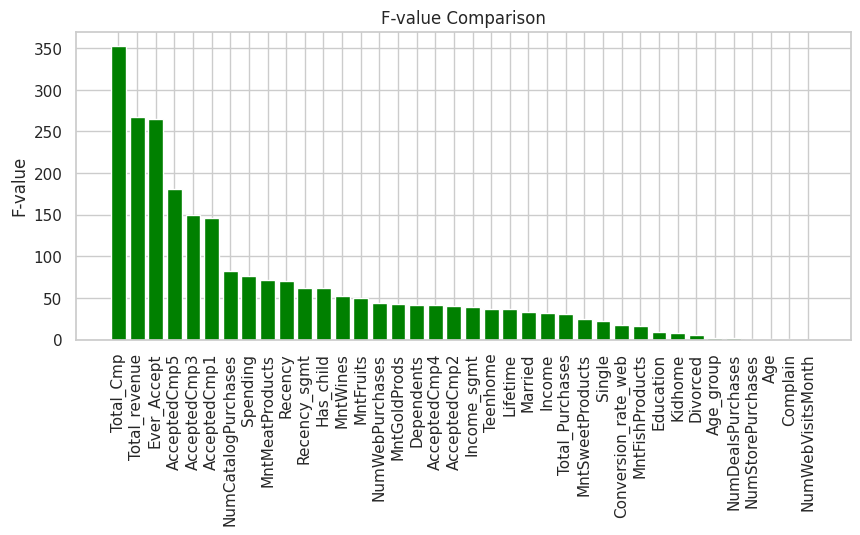

In [69]:
from sklearn.feature_selection import f_classif

# Feature-Namen aus dem Trainingsdatensatz
feature_names = X_train.columns

# Berechnung der F-Werte für jedes Feature im Hinblick auf die Zielvariable
f_value = f_classif(X_train, y_train)

# Erstellung eines DataFrame zur Darstellung der Features und ihrer F-Werte
fs = pd.DataFrame({
    "feature_names":feature_names,
    "f_value":f_value[0]
}).sort_values("f_value", ascending=False)

# Erstellung eines Balkendiagramms zur Visualisierung der F-Werte
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="f_value", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.show()

Mutual information (MI)

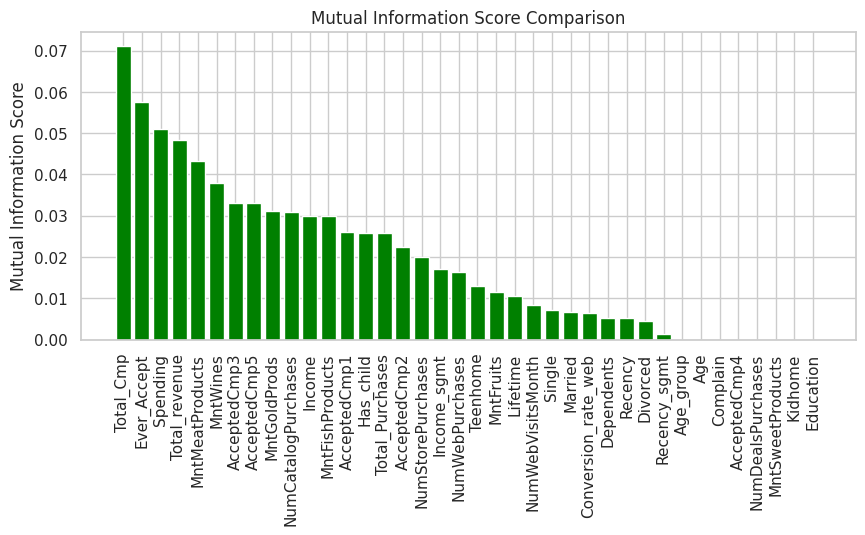

In [70]:
from sklearn.feature_selection import mutual_info_classif

# Berechnung der Mutual Information Scores für jedes Feature im Hinblick auf die Zielvariable
MI_score = mutual_info_classif(X_train, y_train, random_state=0)

# Erstellung eines DataFrame zur Darstellung der Features und ihrer MI-Scores
fs = pd.DataFrame({
    "feature_names":feature_names,
    "MI_score":MI_score
}).sort_values("MI_score", ascending=False)

# Erstellung eines Balkendiagramms zur Visualisierung der MI-Scores
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="MI_score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.show()

Feature importance

[0.03062828 0.03058354 0.01164722 0.01457284 0.04733364 0.03224046
 0.03297225 0.03488356 0.02778484 0.02933094 0.03386471 0.0245113
 0.02803806 0.03242506 0.03217644 0.03127047 0.03038391 0.00772189
 0.02898504 0.01952926 0.00448202 0.00168369 0.03027106 0.02101786
 0.01203955 0.01513906 0.04253548 0.03172166 0.02810887 0.03164097
 0.03523141 0.0431264  0.01504698 0.02786041 0.04624549 0.01147856
 0.02491695 0.01656985]


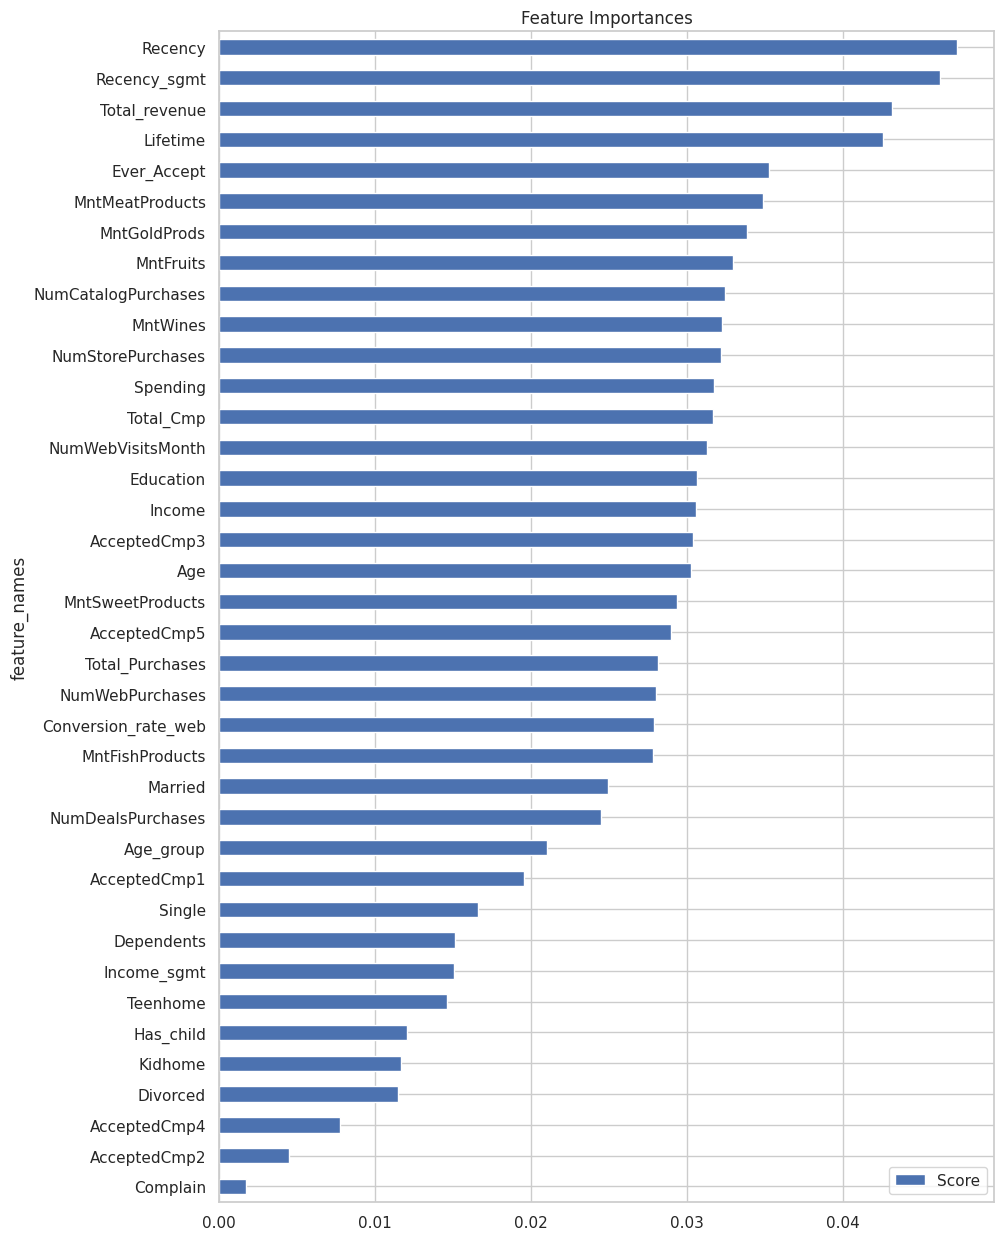

In [71]:
from sklearn.ensemble import ExtraTreesClassifier

# Erstellung und Training des ExtraTreesClassifier-Modells
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

# Ausgabe der Feature importance
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

# Umwandlung der Feature importance in einen DataFrame und Sortierung
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = pd.DataFrame(feat_importances).reset_index(names="feature_names") \
    .rename(columns={0:"Score"}) \
    .sort_values("Score", ascending=False).reset_index(drop=True)

# Visualisierung der Feature importance in einem Balkendiagramm
feat_importances.sort_values("Score", ascending=True).plot(x="feature_names", y="Score", kind='barh', figsize=(10, len(feat_importances) * 0.4))
plt.title('Feature Importances')
plt.show()

In [72]:
# Liste von Features, die entfernt werden sollen
features_to_drop = ["Divorced", "Kidhome", "Single", "Complain", "MntSweetProducts"]

# Entfernen der spezifizierten Features aus der Liste der wichtigen Features
for feature in features_to_drop:
    if feature in feature_importance:
        feature_importance.remove(feature)

# Ausgabe der aktualisierten Liste der feature importance
print(feature_importance)

['Education', 'Income', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age', 'Age_group', 'Has_child', 'Dependents', 'Lifetime', 'Spending', 'Total_Purchases', 'Total_Cmp', 'Ever_Accept', 'Total_revenue', 'Income_sgmt', 'Conversion_rate_web', 'Recency_sgmt', 'Married']


Multikollinearitätsprüfung

<Axes: >

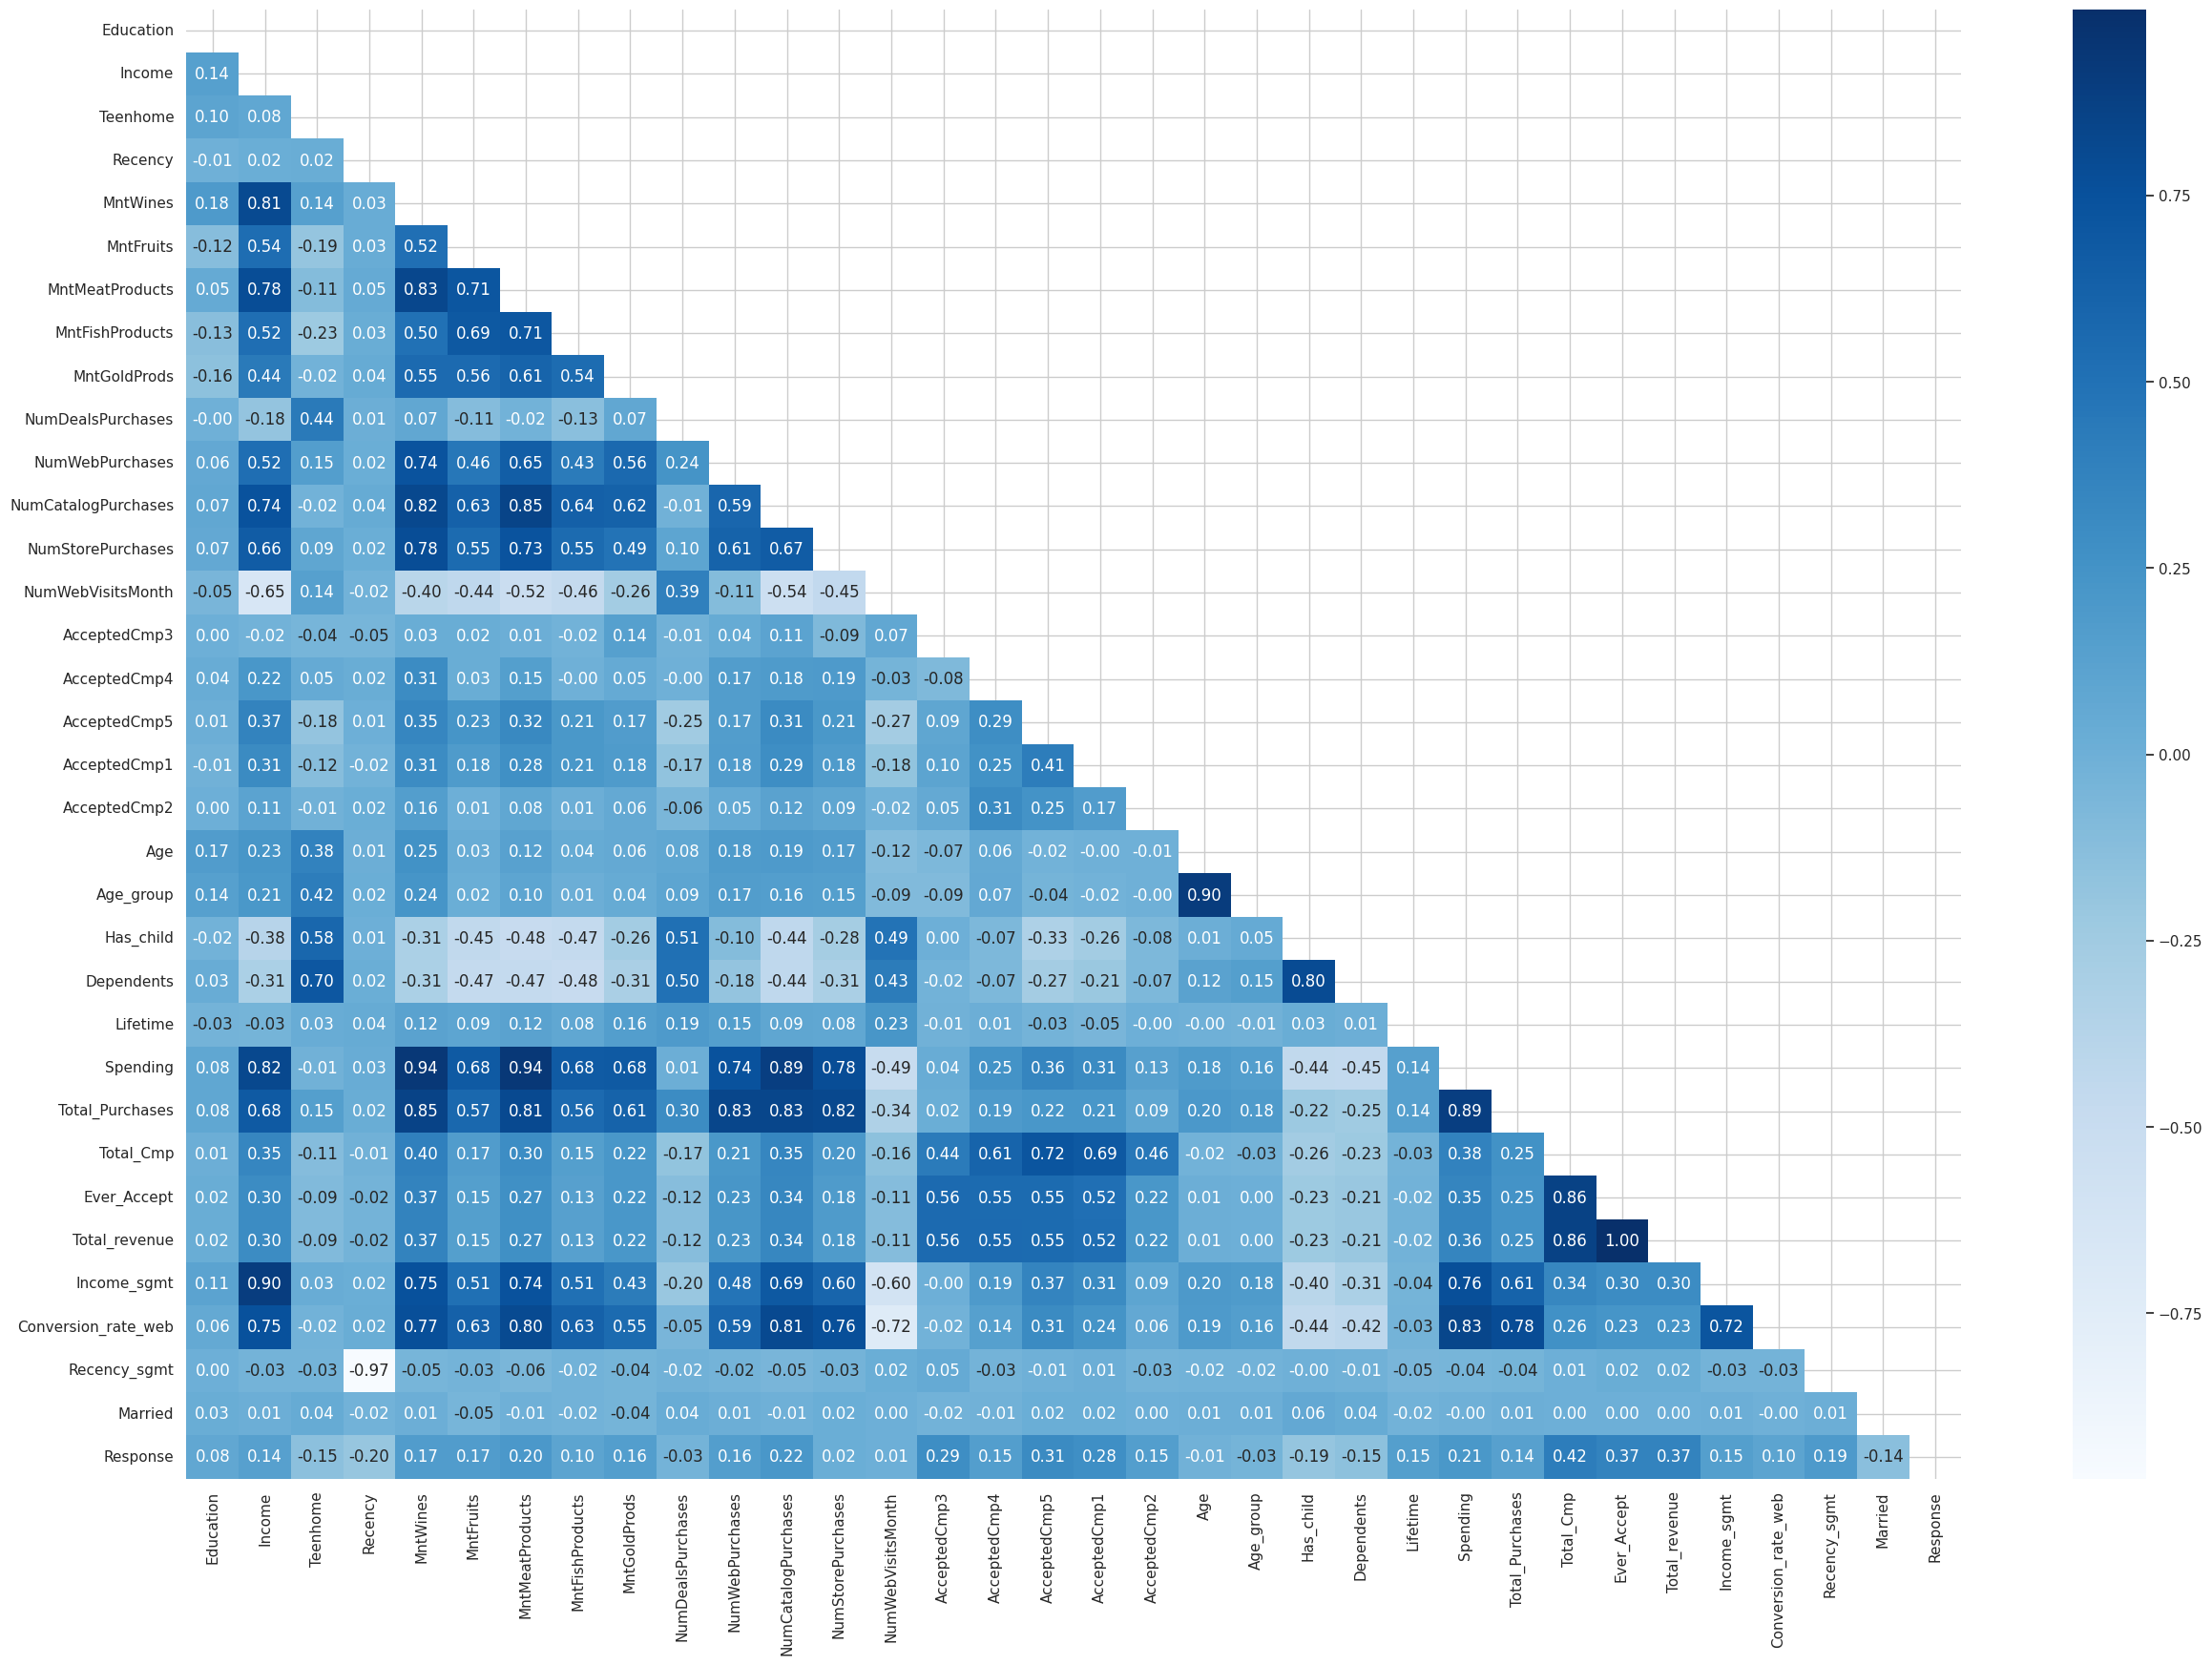

In [73]:
# Erstellen einer Korrelationsmatrix für die wichtigen Features und die Zielvariable
plt.figure(figsize=(30,20))
corr = df_train[feature_importance+["Response"]].corr(numeric_only=True)

# Erstellen einer Maske für die obere Dreieckshälfte der Korrelationsmatrix
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Visualisierung der Korrelationsmatrix in einer Heatmap
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

In [74]:
def corrtarget(x):
    # Berechnet die Korrelation eines Features mit der Zielvariablen "Response"
    target = "Response"
    return df_train[x].corr(df_train[target])

def corrresp(x):
     # Entscheidet, welches von zwei Features basierend auf der Korrelation mit "Response" entfernt werden soll
    target = "Response"
    col1 = x["A"]
    col2 = x["B"]

    # Berechnet die Korrelation beider Features mit "Response"
    cor1 = df_train[col1].corr(df_train[target])
    cor2 = df_train[col2].corr(df_train[target])

    # Gibt das Feature mit der niedrigeren Korrelation zurück
    if cor1 < cor2:
        return col1
    else:
        return col2
    return col1

In [75]:
# Analyse der Feature-Korrelationen im Trainingsdatensatz
corr_matrix = df_train[feature_importance].corr()
target = "Response"

# Erstellen einer abgeflachten Korrelationsmatrix und Filtern von Paaren mit hoher Korrelation
flat_cm = corr_matrix.stack().reset_index()
flat_cm.columns = ['A', 'B', 'correlation']
flat_cm = flat_cm.loc[flat_cm.correlation < 1, :]
flat_cm = flat_cm.sort_values("correlation", ascending=False)
redundan = flat_cm[flat_cm["correlation"] >= 0.7].reset_index(drop=True)

# Berechnung der Korrelation jedes Features mit der Zielvariablen
redundan['A vs Target'] = redundan['A'].apply(lambda x: corrtarget(x))
redundan['B vs Target'] = redundan['B'].apply(lambda x: corrtarget(x))

# Entfernen von Duplikaten und Anwenden der Entscheidungsfunktion zur Feature-Reduktion
redundan = redundan.drop_duplicates(subset=["correlation"])
redundan["drop"] = redundan.apply(corrresp, axis=1)
redundan

A                    B  correlation  A vs Target  \
0           Ever_Accept        Total_revenue        1.000        0.370   
2              Spending      MntMeatProducts        0.938        0.208   
4              Spending             MntWines        0.935        0.208   
6                   Age            Age_group        0.902       -0.014   
8                Income          Income_sgmt        0.898        0.137   
10             Spending  NumCatalogPurchases        0.891        0.208   
12      Total_Purchases             Spending        0.890        0.135   
14            Total_Cmp        Total_revenue        0.865        0.417   
16          Ever_Accept            Total_Cmp        0.862        0.370   
18      Total_Purchases             MntWines        0.854        0.135   
20  NumCatalogPurchases      MntMeatProducts        0.847        0.216   
22      Total_Purchases      NumWebPurchases        0.834        0.135   
24             Spending  Conversion_rate_web        0.834        0.208   
26  NumCatalogPurchases      Total_Purchases        0.831        0.216   
28             MntWines      MntMeatProducts        0.825        0.174   
30      Total_Purchases    NumStorePurchases        0.820        0.135   
32               Income             Spending        0.819        0.137   
34             MntWines  NumCatalogPurchases        0.818        0.174   
36      Total_Purchases      MntMeatProducts        0.815        0.135   
38  Conversion_rate_web  NumCatalogPurchases        0.809        0.102   
40             MntWines               Income        0.806        0.174   
42  Conversion_rate_web      MntMeatProducts        0.803        0.102   
44            Has_child           Dependents        0.797       -0.189   
46      Total_Purchases  Conversion_rate_web        0.784        0.135   
48             MntWines    NumStorePurchases        0.784        0.174   
50             Spending    NumStorePurchases        0.784        0.208   
52               Income      MntMeatProducts        0.781        0.137   
54  Conversion_rate_web             MntWines        0.769        0.102   
56          Income_sgmt             Spending        0.765        0.151   
58  Conversion_rate_web    NumStorePurchases        0.764        0.102   
60  Conversion_rate_web               Income        0.752        0.102   
62             MntWines          Income_sgmt        0.746        0.174   
64               Income  NumCatalogPurchases        0.741        0.137   
66      NumWebPurchases             Spending        0.740        0.160   
68          Income_sgmt      MntMeatProducts        0.739        0.151   
70             MntWines      NumWebPurchases        0.736        0.174   
72    NumStorePurchases      MntMeatProducts        0.734        0.018   
74            Total_Cmp         AcceptedCmp5        0.719        0.417   
76          Income_sgmt  Conversion_rate_web        0.717        0.151   
78            MntFruits      MntMeatProducts        0.709        0.170   
80      MntMeatProducts      MntFishProducts        0.706        0.203   
82           Dependents             Teenhome        0.703       -0.155   

    B vs Target                 drop  
0         0.371          Ever_Accept  
2         0.203      MntMeatProducts  
4         0.174             MntWines  
6        -0.032            Age_group  
8         0.151               Income  
10        0.216             Spending  
12        0.208      Total_Purchases  
14        0.371        Total_revenue  
16        0.417          Ever_Accept  
18        0.174      Total_Purchases  
20        0.203      MntMeatProducts  
22        0.160      Total_Purchases  
24        0.102  Conversion_rate_web  
26        0.135      Total_Purchases  
28        0.203             MntWines  
30        0.018    NumStorePurchases  
32        0.208               Income  
34        0.216             MntWines  
36        0.203      Total_Purchases  
38        0.216  Conversion_rate_web  
40        0.137     

VIF (Variance Inflation Factor)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# Hinzufügen einer Konstanten zur Feature-Matrix, um VIF zu berechnen
X = add_constant(df_train[feature_importance])

# Berechnung der VIF-Scores für jedes Feature
vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const'] # Ausschluss der Konstanten aus den Ergebnissen
vif_df['vif_score'] = round(vif_df['vif_score'], 4)
vif_df.sort_values("vif_score", ascending=False, inplace=True)
vif_df

feature  vif_score
17         AcceptedCmp5        inf
15         AcceptedCmp3        inf
27            Total_Cmp        inf
19         AcceptedCmp2        inf
18         AcceptedCmp1        inf
16         AcceptedCmp4        inf
29        Total_revenue 330370.002
28          Ever_Accept 324343.923
25             Spending     65.604
26      Total_Purchases     25.942
5              MntWines     22.646
32         Recency_sgmt     18.266
4               Recency     18.242
7       MntMeatProducts     13.501
12  NumCatalogPurchases      9.548
2                Income      9.429
31  Conversion_rate_web      8.321
13    NumStorePurchases      6.140
11      NumWebPurchases      6.080
30          Income_sgmt      5.666
21            Age_group      5.649
20                  Age      5.527
23           Dependents      5.372
14    NumWebVisitsMonth      5.260
22            Has_child      3.576
3              Teenhome      3.568
10    NumDealsPurchases      3.337
8       MntFishProducts      2.919
6             MntFruits      2.751
9          MntGoldProds      2.741
1             Education      1.244
24             Lifetime      1.222
33              Married      1.017

In [77]:
# Liste von Features, die beibehalten werden sollen
hold = ["Income"]

# Entfernen der vorgeschlagenen Features aus feature_importance, außer denen in der Liste 'hold'
for i in list(redundan["drop"].unique()):
    if i not in hold:
        feature_importance.remove(i)

# Sortieren der aktualisierten Liste der wichtigen Features
feature_importance = sorted(feature_importance)
feature_importance

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'Age',
 'Education',
 'Income',
 'Lifetime',
 'Married',
 'MntGoldProds',
 'NumCatalogPurchases',
 'NumDealsPurchases',
 'NumWebVisitsMonth',
 'Recency',
 'Recency_sgmt',
 'Teenhome',
 'Total_Cmp']

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# Hinzufügen einer Konstanten zur Feature-Matrix, um VIF zu berechnen
X = add_constant(df_train[feature_importance])

# Berechnung der VIF-Scores für jedes Feature
vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df['vif_score'] = round(vif_df['vif_score'], 4)
vif_df.sort_values("vif_score", ascending=False, inplace=True)
vif_df

feature  vif_score
15         Recency_sgmt     18.070
14              Recency     18.050
17            Total_Cmp     10.099
11  NumCatalogPurchases      3.444
7                Income      3.401
1          AcceptedCmp1      3.346
4          AcceptedCmp4      3.196
3          AcceptedCmp3      2.826
13    NumWebVisitsMonth      2.411
10         MntGoldProds      1.821
12    NumDealsPurchases      1.690
16             Teenhome      1.627
2          AcceptedCmp2      1.563
5                   Age      1.272
8              Lifetime      1.163
6             Education      1.124
9               Married      1.009

In [79]:
df_train[feature_importance].head()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4    Age  Education  \
0             0             0             0             0 -0.552          0   
1             0             0             0             0 -1.009          1   
2             0             0             0             0 -0.199          3   
3             0             0             0             0 -0.027          3   
4             0             0             0             0 -0.027          3   

   Income  Lifetime  Married  MntGoldProds  NumCatalogPurchases  \
0  -2.354     1.534        1        -0.287               -1.340   
1  -0.947     1.282        1        -1.150               -1.340   
2   0.425     0.492        1        -2.117                0.808   
3   0.421    -0.367        1        -2.117               -0.378   
4  -0.713    -1.235        0        -0.202               -0.378   

   NumDealsPurchases  NumWebVisitsMonth  Recency  Recency_sgmt  Teenhome  \
0             -0.837              1.059    0.410             2         0   
1              0.738              1.059    0.348             2         0   
2             -0.837             -1.863    0.030             2         0   
3             -0.837             -0.936   -0.710             3         1   
4             -0.837             -1.384   -0.413             3         0   

   Total_Cmp  
0          0  
1          0  
2          0  
3          0  
4          0

## **Behandlung unausgewogener Daten**

In [80]:
# Aufteilung des DataFrames df_train in Features und Zielvariable
X_train = df_train.drop(['Response'], axis=1)[feature_importance].reset_index(drop=True) #Features
y_train = df_train['Response'].reset_index(drop=True) #Zielvariable

# Ausgabe der Dimensionen der Features und der Zielvariablen
print(X_train.shape, y_train.shape)

(1679, 17) (1679,)


In [81]:
# Aufteilung des DataFrames df_test in Features und Zielvariable
X_test = df_test.drop(['Response'], axis=1)[feature_importance].reset_index(drop=True) #Features
y_test = df_test['Response'].reset_index(drop=True) #Zielvariable

# Ausgabe der Dimensionen der Features und der Zielvariablen
print(X_test.shape, y_test.shape)

(560, 17) (560,)


In [82]:
# Zusammenführen der Trainings- und Test-Feature-Datensätze zu einem einzigen DataFrame
X = pd.concat([X_train,X_test])

# Zusammenführen der Trainings- und Test-Zielvariablen-Datensätze zu einem einzigen DataFrame
y = pd.concat([y_train,y_test])

In [83]:
# Anzeigen der Dimensionen der zusammengeführten Feature- und Zielvariablen-DataFrames

X.shape # Gibt die Anzahl der Zeilen und Spalten in X zurück

(2239, 17)

In [84]:
y.shape # Gibt die Anzahl der Zeilen in y zurück

(2239,)

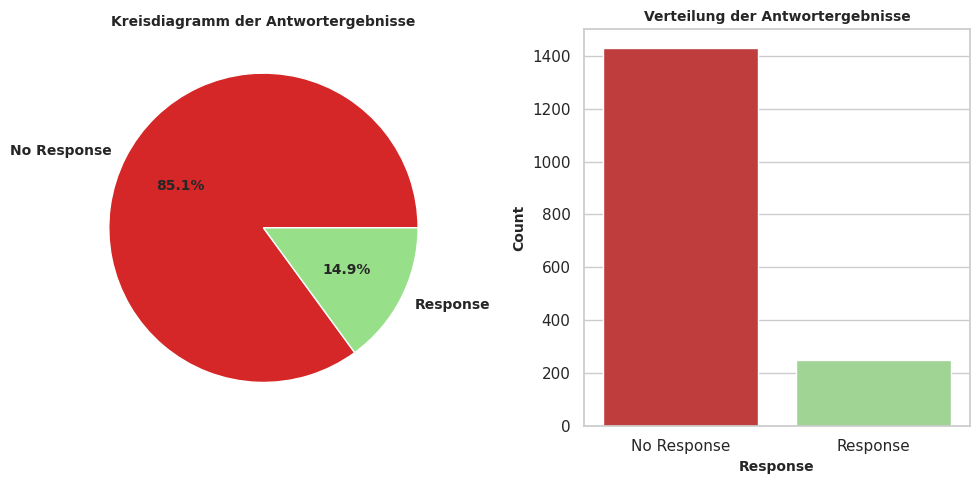

In [85]:
fig = plt.figure(figsize = (10, 5))

# Kreisdiagramm zur Darstellung der Anteile von "Response" und "No Response"
plt.subplot(121)
plt.pie(y_train.value_counts(),
        labels = ['No Response', 'Response'],
        autopct = '%.1f%%',
        radius = 1,
        colors=["#d62728", "#98df8a"],
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Kreisdiagramm der Antwortergebnisse', fontsize = 10, fontweight = 'bold')

# Balkendiagramm zur Darstellung der Anzahl von "Response" und "No Response"
plt.subplot(122)
resp = y_train.apply(lambda x: "No Response" if x == 0 else "Response")
t = sns.countplot(x=resp, palette=["#d62728", "#98df8a"])
t.set_xlabel('Response', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Verteilung der Antwortergebnisse', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

In [86]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Anzeigen der Größen der Trainingsdatensätze vor dem Oversampling
print('Form von X_train vor dem Oversampling: {}'.format(X_train.shape))
print('Form von y_train vor dem Oversampling: {} \n'.format(y_train.shape))

# Anzeigen der Klassenzählungen vor dem Oversampling
print("Anzahl der 'Response' vor dem Oversampling: {}".format(sum(y_train == 1))) # Response
print("Anzahl der 'No Response' vor dem Oversampling: {} \n".format(sum(y_train == 0))) # No Response

# Anwendung von SMOTE zur Erhöhung der Anzahl der Beobachtungen in der Minderheitsklasse
sm = SMOTE(sampling_strategy=0.5, random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X_train,y_train)

# Anzeigen der Größen der Trainingsdatensätze nach dem Oversampling
print('Form von X_train nach dem Oversampling: {}'.format(X_balanced_res.shape))
print('Form von y_train nach dem Oversampling: {} \n'.format(y_balanced_res.shape))

# Anzeigen der Klassenzählungen nach dem Oversampling
print("Anzahl der 'Response' nach dem Oversampling: {}".format(sum(y_balanced_res == 1)))
print("Anzahl der 'No Response' nach dem Oversampling: {}".format(sum(y_balanced_res == 0)))

# Aktualisierung der Trainingsdaten mit den balancierten Daten
X_train = X_balanced_res
y_train = y_balanced_res

Form von X_train vor dem Oversampling: (1679, 17)
Form von y_train vor dem Oversampling: (1679,) 

Anzahl der 'Response' vor dem Oversampling: 251
Anzahl der 'No Response' vor dem Oversampling: 1428 

Form von X_train nach dem Oversampling: (2142, 17)
Form von y_train nach dem Oversampling: (2142,) 

Anzahl der 'Response' nach dem Oversampling: 714
Anzahl der 'No Response' nach dem Oversampling: 1428


# **Modellentwicklung und -evaluation**

## **Klassifikationsmodelle**

In [87]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.0 MB/s eta 0:00:00


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Support Vector Machine
from sklearn.neural_network import MLPClassifier # Neural Network
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import shap

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

import re
import warnings
warnings.filterwarnings('ignore')

## **Funktionen zur Modellbewertung**

In [89]:
# Initialisierung von Listen zur Speicherung von Bewertungsmetriken für Trainingsdaten

train_classifier_list = [] # Speichert Klassifizierer-Objekte
train_modelname_list = [] # Speichert Modellnamen
train_accuracy_list = [] # Speichert Genauigkeitswerte
train_precision_list = [] # Speichert Präzisionswerte
train_recall_list = [] # Speichert Rückrufwerte
train_fbeta_score_list= [] # Speichert F-Beta-Scores
train_f1_score_list= [] # Speichert F1-Scores
train_roc_auc_score_list = [] # Speichert ROC-AUC-Werte
train_cross_val_f1_list = [] # Speichert F1-Scores aus Kreuzvalidierung
train_cross_val_rocauc_list = [] # Speichert ROC-AUC-Werte aus Kreuzvalidierung

# Initialisierung von Listen zur Speicherung von Bewertungsmetriken für Testdaten
test_classifier_list = []
test_modelname_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_fbeta_score_list= []
test_f1_score_list= []
test_roc_auc_score_list = []
test_cross_val_f1_list = []
test_cross_val_rocauc_list = []

In [90]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

# Mischen der Daten, um eine zufällige Reihenfolge zu gewährleisten
X_s, y_s = shuffle(X, y, random_state=42)

# Initialisierung von KFold für die Kreuzvalidierung
kf = KFold(10, shuffle=True, random_state=0)

Funktion zur Bewertung der Klassifikation


In [91]:
def eval_classification(model, model_name, save=True):
    # Vorhersagen für Trainingsdaten
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)

    # Vorhersagen für Testdaten
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)

    # Durchführen der Kreuzvalidierung
    cv_score_f1 = cross_validate(model, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    cv_score_rocauc = cross_validate(model, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)

    # Berechnen der Bewertungsmetriken für Trainingsdaten
    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    fbeta_s_train = round(fbeta_score(y_train, y_train_pred, beta=0.5), 3)
    f1_s_train = round(f1_score(y_train, y_train_pred), 3)
    csf_score_train = round(cv_score_f1['train_score'].mean(), 3)
    rocauc_score_train = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)
    csr_score_train = round(cv_score_rocauc['train_score'].mean(), 3)

    # Berechnen der Bewertungsmetriken für Testdaten
    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    fbeta_s_test = round(fbeta_score(y_test, y_test_pred, beta=0.5), 3)
    f1_s_test = round(f1_score(y_test, y_test_pred), 3)
    csf_score_test = round(cv_score_f1['test_score'].mean(), 3)
    rocauc_score_test = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)
    csr_score_test = round(cv_score_rocauc['test_score'].mean(), 3)

    if save :

        # Speichern der Bewertungsdetails für Trainingsdaten
        train_classifier_list.append(model)
        train_modelname_list.append(model_name)
        train_accuracy_list.append(accuracy_train)
        train_precision_list.append(precision_train)
        train_recall_list.append(recall_train)
        train_fbeta_score_list.append(fbeta_s_train)
        train_f1_score_list.append(f1_s_train)
        train_cross_val_f1_list.append(csf_score_train)
        train_roc_auc_score_list.append(rocauc_score_train)
        train_cross_val_rocauc_list.append(csr_score_train)

        # Speichern der Bewertungsdetails für Testdaten
        test_classifier_list.append(model)
        test_modelname_list.append(model_name)
        test_accuracy_list.append(accuracy_test)
        test_precision_list.append(precision_test)
        test_recall_list.append(recall_test)
        test_fbeta_score_list.append(fbeta_s_test)
        test_f1_score_list.append(f1_s_test)
        test_cross_val_f1_list.append(csf_score_test)
        test_roc_auc_score_list.append(rocauc_score_test)
        test_cross_val_rocauc_list.append(csr_score_test)


    # Erstellen einer Tabelle mit einer Zusammenfassung der Bewertungsmetriken
    metrics_summary = pd.DataFrame({
        'Evaluation Metrics' : ["Accuracy", "Precision", "Recall", "F0.5 Score", "F1 Score", "F1 Score (crossval)", "ROC AUC", "ROC AUC (crossval)"],
        'Train' : [accuracy_train, precision_train, recall_train, fbeta_s_train, f1_s_train, csf_score_train, rocauc_score_train, csr_score_train],
        'Test' : [accuracy_test, precision_test, recall_test, fbeta_s_test, f1_s_test, csf_score_test, rocauc_score_test, csr_score_test]})
    metrics_summary["Diff Range"] = metrics_summary['Train'] - metrics_summary['Test']

    # Formatierung und Rückgabe der Tabelle
    return metrics_summary.reset_index(drop = True).style.format(precision=3).background_gradient(cmap='Purples')

def show_best_hyperparameter(model):
    # Anzeigen der besten Hyperparameter für das gegebene Modell
    print(model.best_estimator_.get_params())

Funktion zur Bewertung des Trainings

In [92]:
def model_eval_train(classifier, model_name, X_train, y_train):
    # Vorhersagen auf Trainingsdaten und Berechnung verschiedener Leistungsmetriken
    y_train_pred = classifier.predict(X_train)
    y_train_pred_prob = classifier.predict_proba(X_train)

    # Ausgabe des Klassifizierungsberichts
    print('Classification Report Training Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_train, y_train_pred), 3)
    precision = round(precision_score(y_train, y_train_pred), 3)
    recall = round(recall_score(y_train, y_train_pred), 3)
    fbeta_s = round(fbeta_score(y_train, y_train_pred, beta=0.5), 3)
    f1_s = round(f1_score(y_train, y_train_pred), 3)
    rocauc_score = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)

    # Durchführung und Auswertung der Kreuzvalidierung
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['train_score'].mean(), 3)
    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['train_score'].mean(), 3)

    # Ausgabe der berechneten Metriken
    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F0.5 Score = {fbeta_s}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    # Ausgabe des detaillierten Klassifizierungsberichts
    print(classification_report(y_train, y_train_pred))

    # Konfusionsmatrix erstellen und auswerten
    conf_matrix = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

    # Ausgabe der tatsächlichen und vorhergesagten Daten
    print("==== Actual Data (Train) =====")
    print("Total =", len(y_train))
    print("No Response =", len(y_train[y_train == 0]))
    print("Response =", len(y_train[y_train == 1]))
    print("==== Predicted Data (Train) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # Visualisierung der Konfusionsmatrix
    plt.figure(figsize=[8,5])

    c_matrix = confusion_matrix(y_train, y_train_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Greens')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Training Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC-AUC-Kurve zeichnen
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_train, y_train_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

Funktion zur Bewertung des Tests

In [93]:
def model_eval_test(classifier, model_name, X_test, y_test):

    # Vorhersagen auf Testdaten und Berechnung verschiedener Leistungsmetriken
    y_test_pred = classifier.predict(X_test)
    y_test_pred_prob = classifier.predict_proba(X_test)


    # Ausgabe des Klassifizierungsberichts
    print('Classification Report Testing Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_test, y_test_pred), 3)
    precision = round(precision_score(y_test, y_test_pred), 3)
    recall = round(recall_score(y_test, y_test_pred), 3)
    fbeta_s = round(fbeta_score(y_test, y_test_pred, beta=0.5), 3)
    f1_s = round(f1_score(y_test, y_test_pred), 3)
    rocauc_score = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)

    # Durchführung und Auswertung der Kreuzvalidierung
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['test_score'].mean(), 3)
    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['test_score'].mean(), 3)

    # Ausgabe der berechneten Metriken
    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F0.5 Score = {fbeta_s}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    # Ausgabe des detaillierten Klassifizierungsberichts
    print(classification_report(y_test, y_test_pred))

    # Konfusionsmatrix erstellen und auswerten
    conf_matrix = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

    # Ausgabe der tatsächlichen und vorhergesagten Daten
    print("==== Actual Data (Test) =====")
    print("Total =", len(y_test))
    print("No Response =", len(y_test[y_test == 0]))
    print("Response =", len(y_test[y_test == 1]))
    print("==== Predicted Data (Test) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # Visualisierung der Konfusionsmatrix
    plt.figure(figsize=[8,5])

    c_matrix = confusion_matrix(y_test, y_test_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Oranges')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Testing Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC-AUC-Kurve zeichnen
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

Funktion zur Darstellung der Feature-Importance

In [94]:
def feature_importance_plot(classifier, model_name, X_train=None):

    # Entfernen von Klammern und zusätzlichen Informationen aus dem Modellnamen
    model_name = re.sub('\s*\(\w*\)\s*', '', model_name)


    # Bestimmung der Feature-Importance abhängig vom Modelltyp
    if model_name == "Logistic Regression":
        # Berechnung der Feature-Importance für logistische Regression
        imp = pd.DataFrame(data={
            'Attribute': X_train.columns,
            'Importance': log_model.coef_[0]
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    elif model_name in ["MLP Classifier", "Support Vector Machine"]:
        # Berechnung der Feature-Importance für Modelle ohne direkte Feature-Importance-Methode
        imp = pd.DataFrame(data={
            'Attribute': X_train.columns,
            'Importance': permutation_importance(classifier, X_test, y_test).importances_mean
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    else:
        # Berechnung der Feature-Importance für # Random Forest und XGBoost Classifier
        ft_imp = classifier.feature_importances_

    # Erstellen einer sortierten Serie der Feature-Importance
    importances = pd.Series(ft_imp, index=X.columns).sort_values(ascending=False)

    # Visualisierung der Feature-Importance
    plt.figure(figsize=(10,7))
    fig = importances.plot(kind ='barh', color='#7faadb', width=0.8)
    plt.title('Features Importance Plot '+model_name+'\n', fontsize=14)

    # Beschriftung jedes Balkens mit seinem Wert
    N = len(importances)
    thickness = range(1, N+1)
    thick_sum = sum(thickness)
    barmax = max(importances)
    for i, p in enumerate(fig.patches):
            fig.annotate("%.2f" % (p.get_width()),
                        (p.get_x() + p.get_width(), p.get_y() + 1),
                        xytext=(5, 15), textcoords='offset points')
            fig.set_ylim(N, -1)
            fig.set_xlim(0,barmax*1.4)

    fig.figure.tight_layout()
    plt.show()

Funktion zur Darstellung der SHAP-Analyse

In [95]:
def shap_plot(model, model_name, data=None):

    # Entfernen von Klammern und zusätzlichen Informationen aus dem Modellnamen
    model_name = re.sub('\s*\(\w*\)\s*', '', model_name)

    tree = ["Random Forest", "XGBoost Classifier"]

    # Initialisierung von SHAP
    shap.initjs()

    # Spezifische Behandlung für Baum-basierte Modelle
    if model_name in tree:

        # Explainer und SHAP-Werte für XGBoost
        if model_name in ["XGBoost Classifier"] :
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data)
            expected = explainer.expected_value
        else:
            # Explainer und SHAP-Werte für Random Forest
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data)[1]
            expected = explainer.expected_value[1]

        # Visualisierung der SHAP-Werte
        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values, data, show = False)
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values, data, plot_type='bar', show = False, cmap = "plasma")
        plt.gcf().set_size_inches(20,8)
        plt.tight_layout()
        plt.show()

        # Erstellung eines SHAP-Kraftdiagramms (Force Plot)
        return shap.force_plot(expected, shap_values[0], data.iloc[0,:], plot_cmap = "PkYg", show = False)

    else :

        # Behandlung für nicht-baum-basierte Modelle
        explainer = shap.Explainer(model.predict, data)
        shap_values = explainer(data)

        # Visualisierung der SHAP-Werte
        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values.values, data, show = False)
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values.values, data, plot_type='bar', show = False, cmap = "plasma")
        plt.gcf().set_size_inches(20,8)
        plt.tight_layout()
        plt.show()

        # Erstellung eines SHAP-Kraftdiagramms (Force Plot)
        return shap.force_plot(shap_values.base_values[0], shap_values.values[0], data.iloc[0,:], plot_cmap = "PkYg", show = False)

## **Modellentwicklung**







### **Random Forest**



In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Definition des Parametergitters für die Hyperparametersuche
param_grid = {
    'n_estimators': [100, 200, 300],  # Anzahl der Bäume in the forest
    'max_depth': [None, 10, 20, 30],  # Maximale Tiefe der Bäume
    'min_samples_split': [2, 5, 10],  # Mindestanzahl an Proben zum Teilen eines Knotens
    'min_samples_leaf': [1, 2, 4],    # Mindestanzahl an Proben in einem Blattknoten
}

# Erstellen eines Basis-Modells
rf = RandomForestClassifier(random_state=42)

# Initialisierung des GridSearchCV-Objekts
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Anpassen des GridSearchCV an die Daten
grid_search.fit(X_train, y_train)

# Bestimmung der besten Parameter
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Trainieren eines neuen Klassifizierers mit den besten gefundenen Parametern
rf_model = RandomForestClassifier(**best_params, random_state=2)
rf_model.fit(X_train, y_train)

# Ausgabe des trainierten Modells und Bewertung dessen Leistung
print(rf_model)
eval_classification(rf_model, "Random Forest")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(n_estimators=200, random_state=2)


Classification Report Training Model (Random Forest):

Accuracy = 0.997
Precision = 0.996
Recall = 0.994
F0.5 Score = 0.996
F1 Score = 0.995
Cross Val F1 (k=5) = 0.972
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1428
           1       1.00      0.99      1.00       714

    accuracy                           1.00      2142
   macro avg       1.00      1.00      1.00      2142
weighted avg       1.00      1.00      1.00      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 710, FP = 3, TN = 1425, FN = 4
Predictly Correct = 2135
Predictly Wrong = 7 



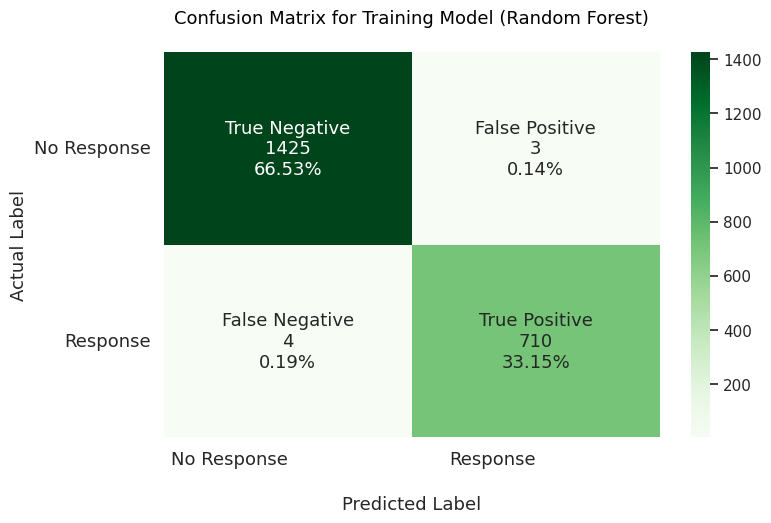

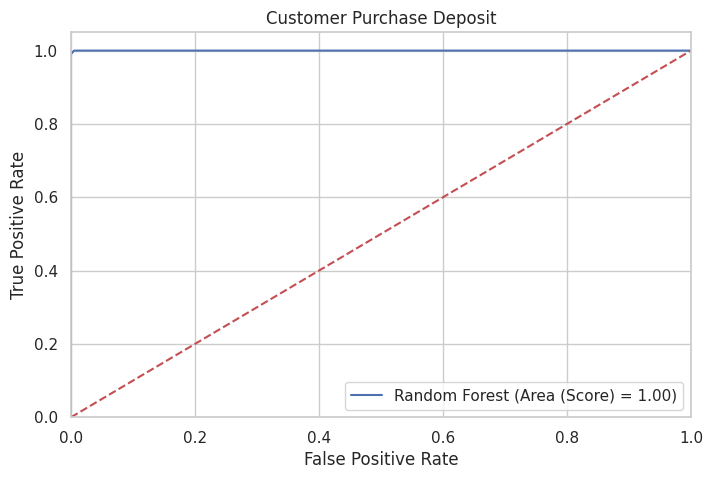

In [97]:
# Bewertung des RandomForest-Modells auf den Trainingsdaten
model_eval_train(rf_model, "Random Forest", X_train, y_train)

Classification Report Testing Model (Random Forest):

Accuracy = 0.902
Precision = 0.726
Recall = 0.542
F0.5 Score = 0.68
F1 Score = 0.621
Cross Val F1 (k=5) = 0.529
ROC AUC = 0.895
Cross Val ROC AUC (k=5) = 0.889

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       477
           1       0.73      0.54      0.62        83

    accuracy                           0.90       560
   macro avg       0.82      0.75      0.78       560
weighted avg       0.89      0.90      0.90       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 45, FP = 17, TN = 460, FN = 38
Predictly Correct = 505
Predictly Wrong = 55 



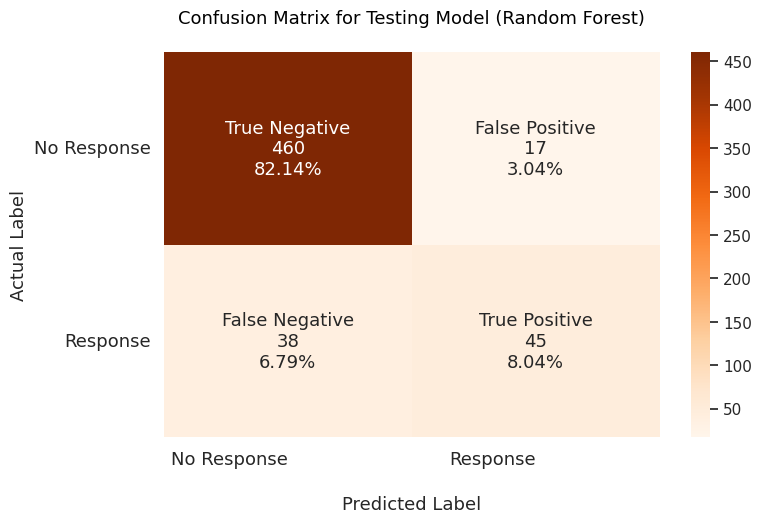

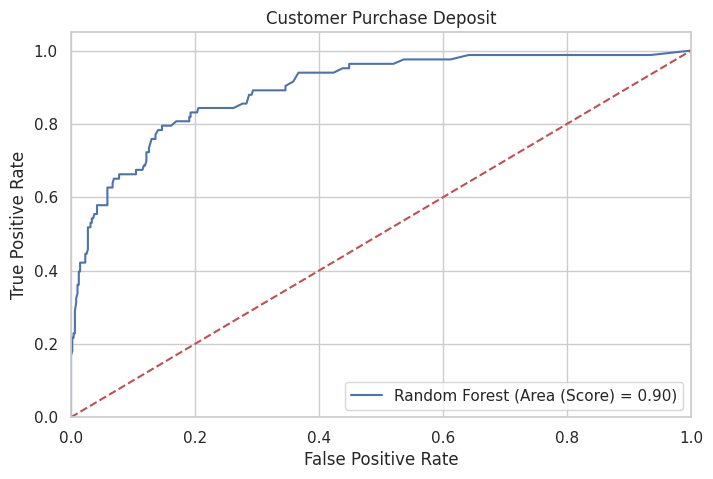

In [98]:
# Bewertung des RandomForest-Modells auf den Testdaten
model_eval_test(rf_model, "Random Forest", X_test, y_test)

In [99]:
# Berechnung der Trainingsgenauigkeit
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)

# Berechnung der Testgenauigkeit
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)

# Ausgabe der Trainings- und Testgenauigkeit
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 99.67 %
Test Accuracy: 90.18 %


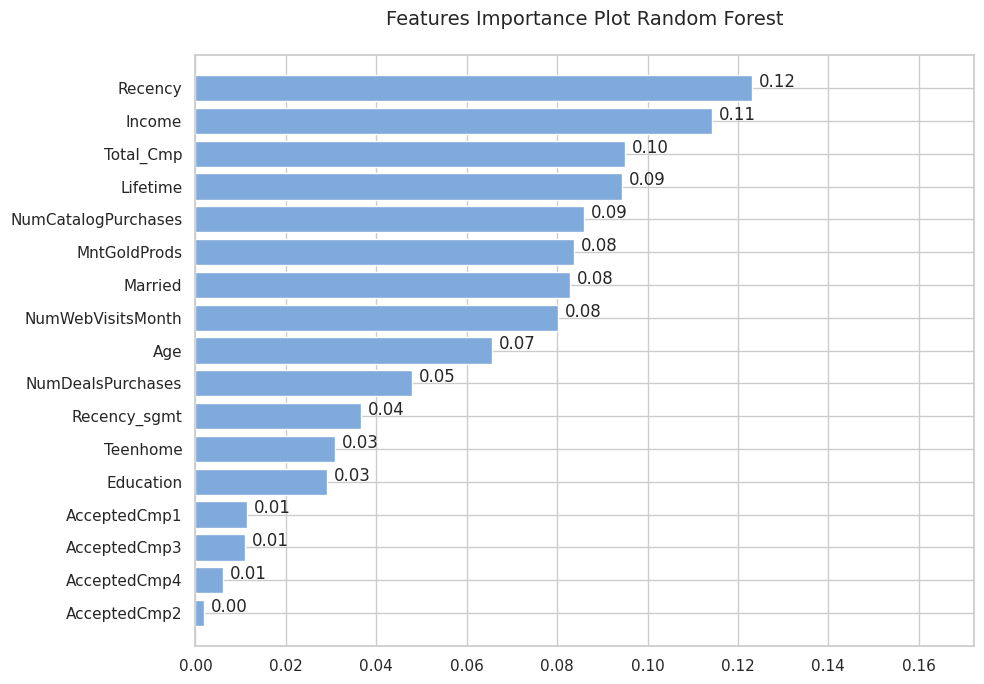

In [100]:
# Visualisierung der Feature-importance für das RandomForest-Modell
feature_importance_plot(rf_model, "Random Forest")

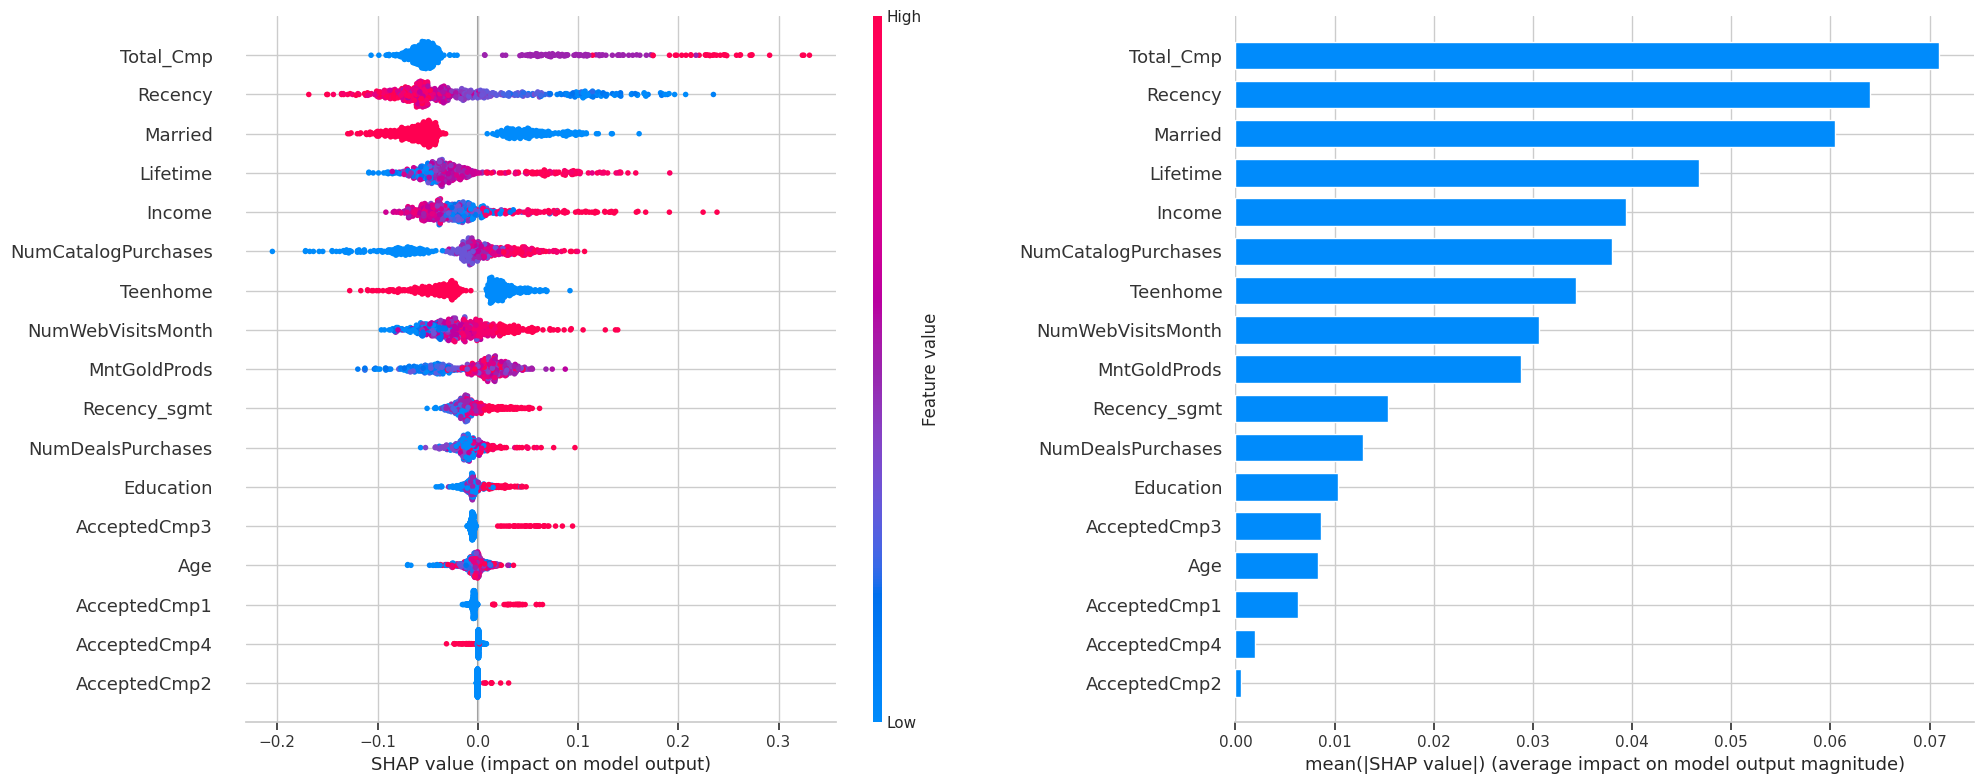

In [101]:
# Durchführung einer SHAP-Analyse und Visualisierung der Ergebnisse
shap_plot(rf_model, "Random Forest", X_test)

### **Logistische Regression**


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definition des Parametergitters für die Hyperparametersuche der Logistischen Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Unterschiedliche Normen für die Regularisierung
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverser Wert der Regularisierungsstärke; muss eine positive Fließkommazahl sein
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithmus für das Optimierungsproblem
    'max_iter': [100, 200, 300]  # Anzahl der Iterationen bis zur Konvergenz der Solver
}

# Erstellen eines Basis-Modells
log_reg = LogisticRegression(random_state=42)

# Initialisierung des GridSearchCV-Objekts
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Anpassen des GridSearchCV an die Daten
grid_search.fit(X_train, y_train)

# Ermittlung der besten Parameter
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Trainieren eines neuen Klassifizierers mit den besten gefundenen Parametern
log_model = LogisticRegression(**best_params)

# Anpassen des Modells an die Trainingsdaten
log_model.fit(X_train, y_train)

# Ausgabe des trainierten Modells und Bewertung dessen Leistung
print(log_model)
eval_classification(log_model, "Logistic Regression")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.1, solver='liblinear')


Classification Report Training Model (Logistic Regression):

Accuracy = 0.817
Precision = 0.769
Recall = 0.647
F0.5 Score = 0.741
F1 Score = 0.703
Cross Val F1 (k=5) = 0.511
ROC AUC = 0.882
Cross Val ROC AUC (k=5) = 0.888

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1428
           1       0.77      0.65      0.70       714

    accuracy                           0.82      2142
   macro avg       0.80      0.77      0.79      2142
weighted avg       0.81      0.82      0.81      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 462, FP = 139, TN = 1289, FN = 252
Predictly Correct = 1751
Predictly Wrong = 391 



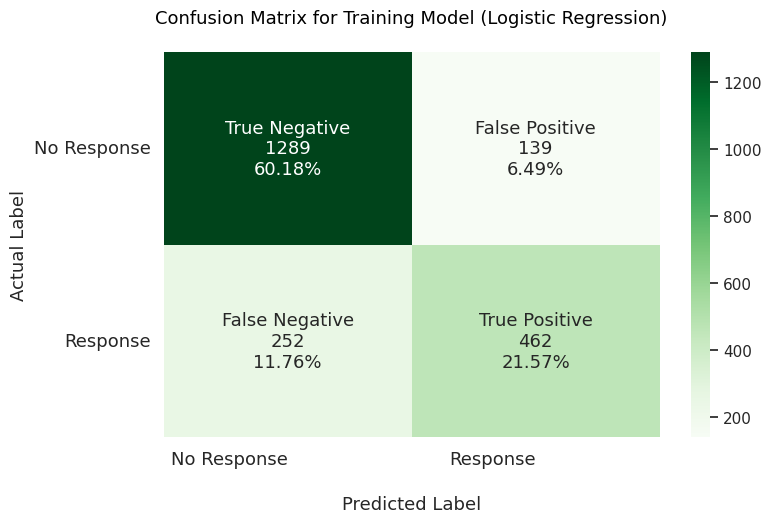

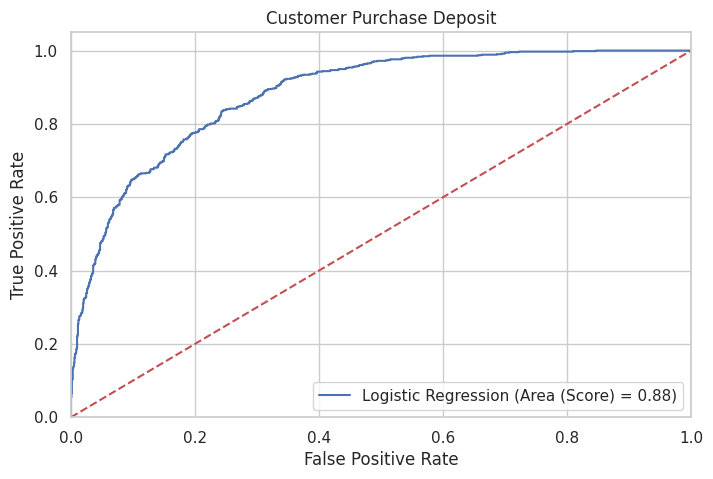

In [103]:
# Bewertung des Logistischen Regressionsmodells auf den Trainingsdaten
model_eval_train(log_model, "Logistic Regression", X_train, y_train)

Classification Report Testing Model (Logistic Regression):

Accuracy = 0.861
Precision = 0.524
Recall = 0.651
F0.5 Score = 0.545
F1 Score = 0.581
Cross Val F1 (k=5) = 0.498
ROC AUC = 0.903
Cross Val ROC AUC (k=5) = 0.882

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       477
           1       0.52      0.65      0.58        83

    accuracy                           0.86       560
   macro avg       0.73      0.77      0.75       560
weighted avg       0.88      0.86      0.87       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 54, FP = 49, TN = 428, FN = 29
Predictly Correct = 482
Predictly Wrong = 78 



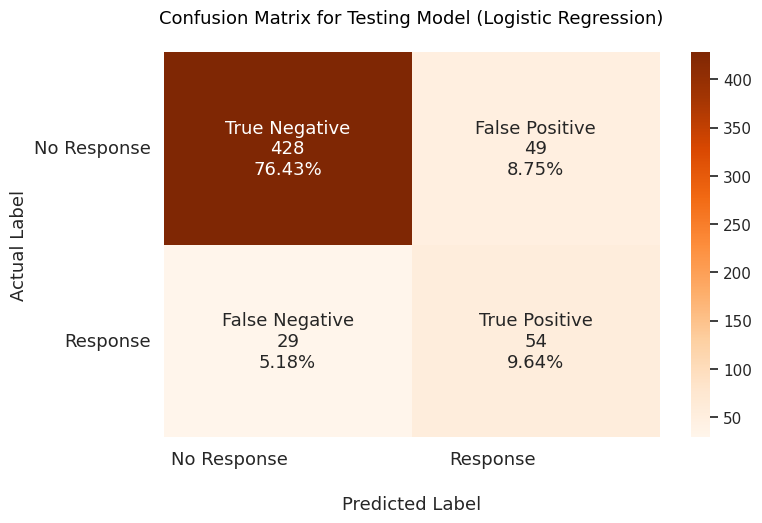

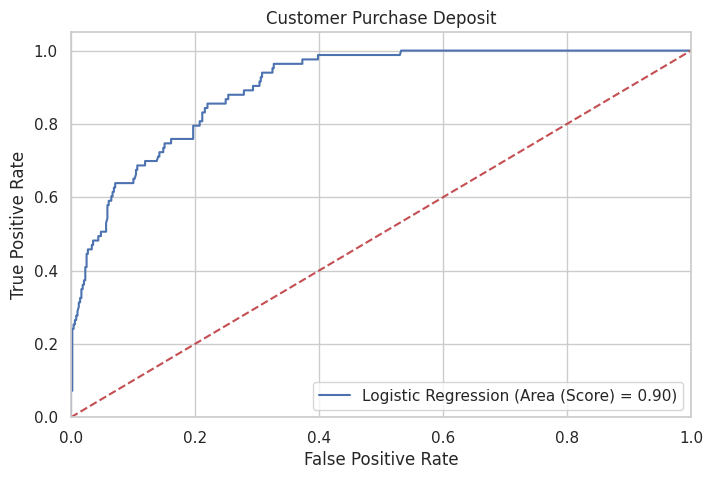

In [104]:
# Bewertung des Logistischen Regressionsmodells auf den Testdaten
model_eval_test(log_model, "Logistic Regression", X_test, y_test)

In [105]:
# Berechnung der Trainingsgenauigkeit
acc_log_train=round(log_model.score(X_train,y_train)*100,2)

# Berechnung der Testgenauigkeit
acc_log_test=round(log_model.score(X_test,y_test)*100,2)

# Ausgabe der Trainings- und Testgenauigkeit
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 81.75 %
Test Accuracy: 86.07 %


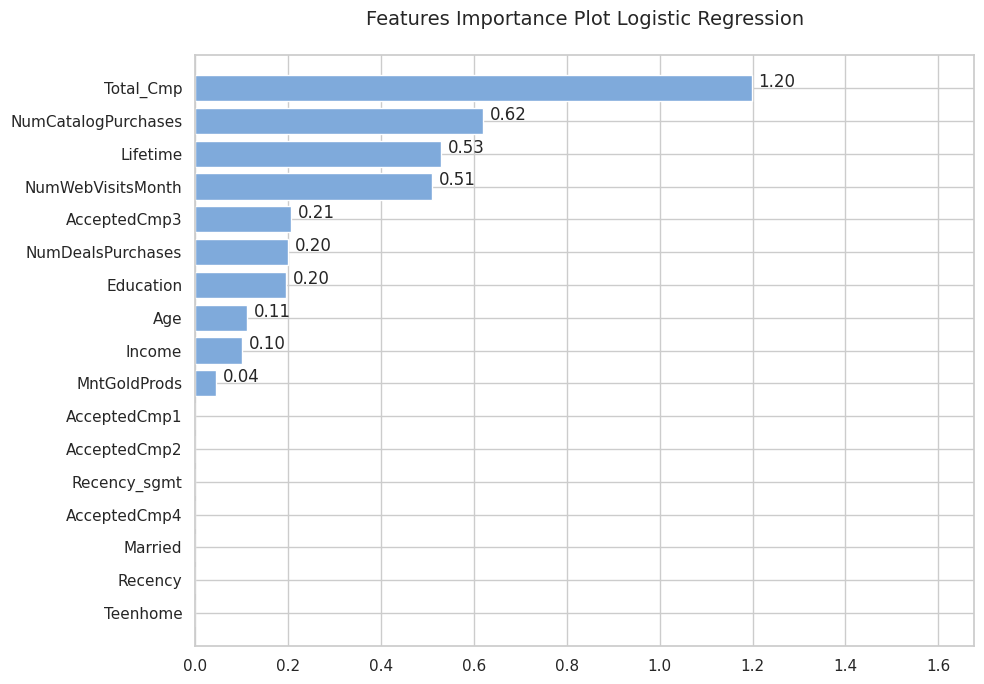

In [106]:
# Visualisierung der Feature-importance für das Logistische Regressionsmodell
feature_importance_plot(log_model, "Logistic Regression", X_train)

PermutationExplainer explainer: 561it [00:22, 16.63it/s]                         


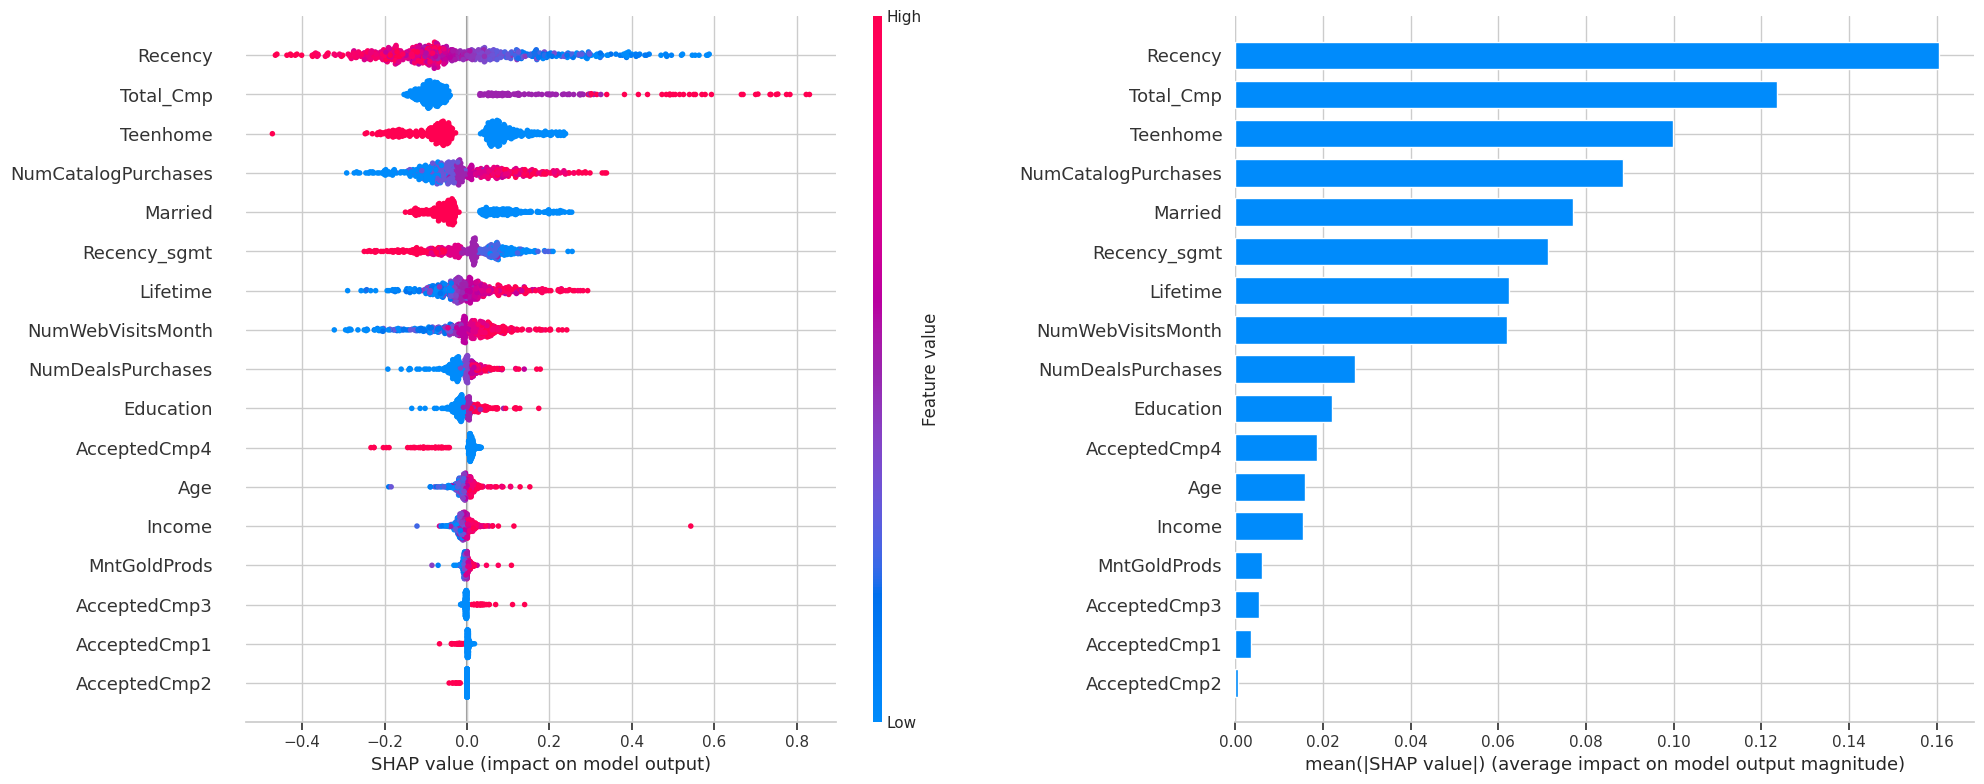

In [107]:
# Aufrufen der SHAP-Analysefunktion für das Logistische Regressionsmodell
shap_plot(log_model, "Logistic Regression", X_test)

### **XGBoost Classifier**

XGBoost (Extreme Gradient Boosting) is a development of the Gradient Tree Boosting algorithm that is based on ensemble algorithms and can efficiently handle large-scale machine learning problems.

In [108]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definition der Hyperparameterbereiche für die Optimierung
param_grid = {
    'n_estimators': [50, 100, 150],  # Optionen für die Anzahl der Bäume
    'max_depth': [3, 5, 7],          # Optionen für die Baumtiefe
    'learning_rate': [0.01, 0.1],    # Optionen für die Lernrate
    'subsample': [0.8, 1.0]          # Anteil der für das Training verwendeten Stichproben
}

# Initialisierung des XGBoost-Klassifizierers
xgb_model = XGBClassifier(random_state=42)

# Konfiguration von GridSearchCV für die Hyperparameter-Optimierung
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,             # 5-fold cross-validation
    n_jobs=-1,        # Utilize all processor cores
    verbose=2         # Detailed logging
)

# Durchführung der Hyperparameter-Optimierung
grid_search.fit(X_train, y_train)

# Ausgabe der besten Parameter und des entsprechenden Scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Verwendung des besten Modells aus GridSearchCV
xgb_model = grid_search.best_estimator_
eval_classification(xgb_model, "XGBoost Classifier")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.900595821623859


Classification Report Training Model (XGBoost Classifier):

Accuracy = 0.994
Precision = 0.996
Recall = 0.987
F0.5 Score = 0.994
F1 Score = 0.992
Cross Val F1 (k=5) = 0.965
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1428
           1       1.00      0.99      0.99       714

    accuracy                           0.99      2142
   macro avg       0.99      0.99      0.99      2142
weighted avg       0.99      0.99      0.99      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 705, FP = 3, TN = 1425, FN = 9
Predictly Correct = 2130
Predictly Wrong = 12 



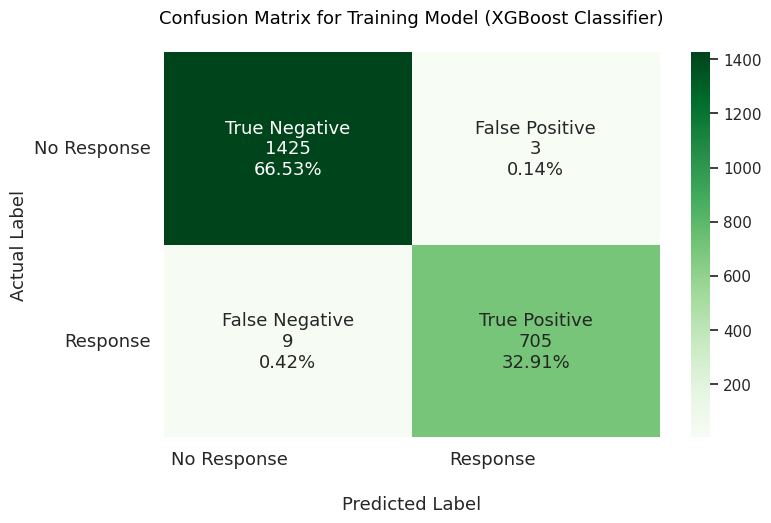

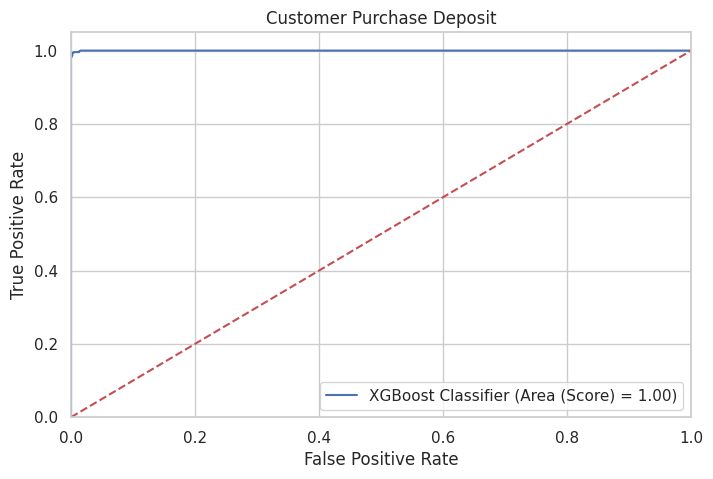

In [109]:
# Bewertung des XGBoost-Klassifizierungsmodells auf den Trainingsdaten
model_eval_train(xgb_model, "XGBoost Classifier", X_train, y_train)

Classification Report Testing Model (XGBoost Classifier):

Accuracy = 0.891
Precision = 0.657
Recall = 0.554
F0.5 Score = 0.634
F1 Score = 0.601
Cross Val F1 (k=5) = 0.525
ROC AUC = 0.901
Cross Val ROC AUC (k=5) = 0.89

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       477
           1       0.66      0.55      0.60        83

    accuracy                           0.89       560
   macro avg       0.79      0.75      0.77       560
weighted avg       0.88      0.89      0.89       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 46, FP = 24, TN = 453, FN = 37
Predictly Correct = 499
Predictly Wrong = 61 



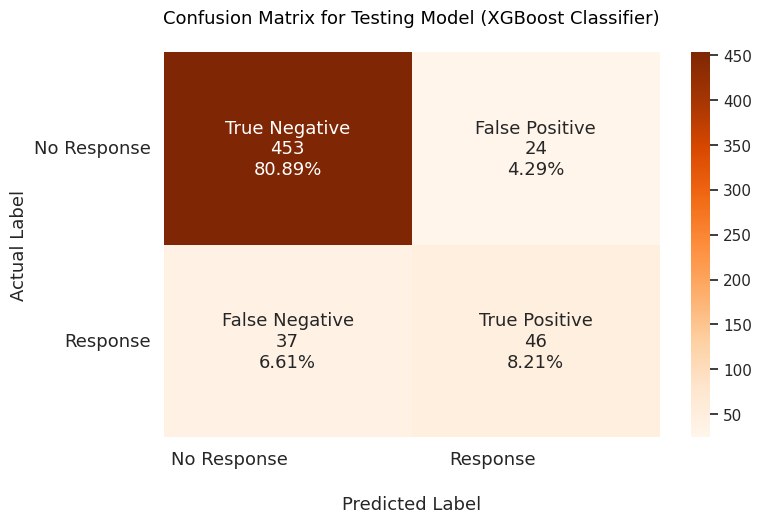

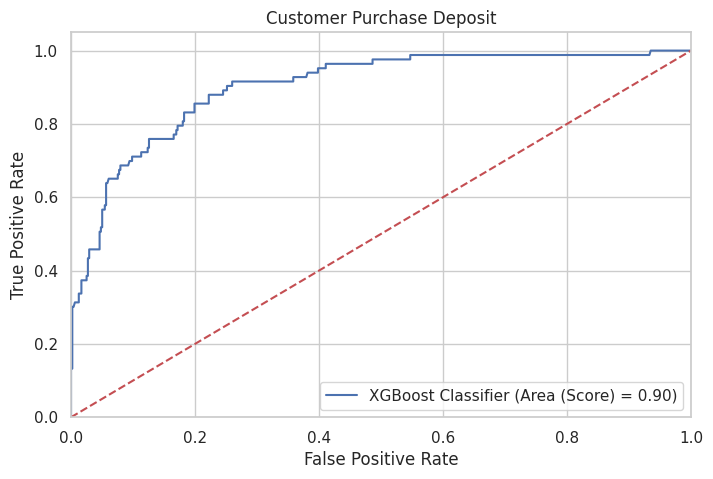

In [110]:
# Bewertung des XGBoost-Klassifizierungsmodells auf den Testdaten
model_eval_test(xgb_model, "XGBoost Classifier", X_test, y_test)

In [111]:
# Berechnung der Trainingsgenauigkeit des XGBoost-Modells
acc_xgb_train=round(xgb_model.score(X_train,y_train)*100,2)

# Berechnung der Testgenauigkeit des XGBoost-Modells
acc_xgb_test=round(xgb_model.score(X_test,y_test)*100,2)

# Ausgabe der Trainings- und Testgenauigkeit
print("Training Accuracy: {} %".format(acc_xgb_train))
print("Test Accuracy: {} %".format(acc_xgb_test))

Training Accuracy: 99.44 %
Test Accuracy: 89.11 %


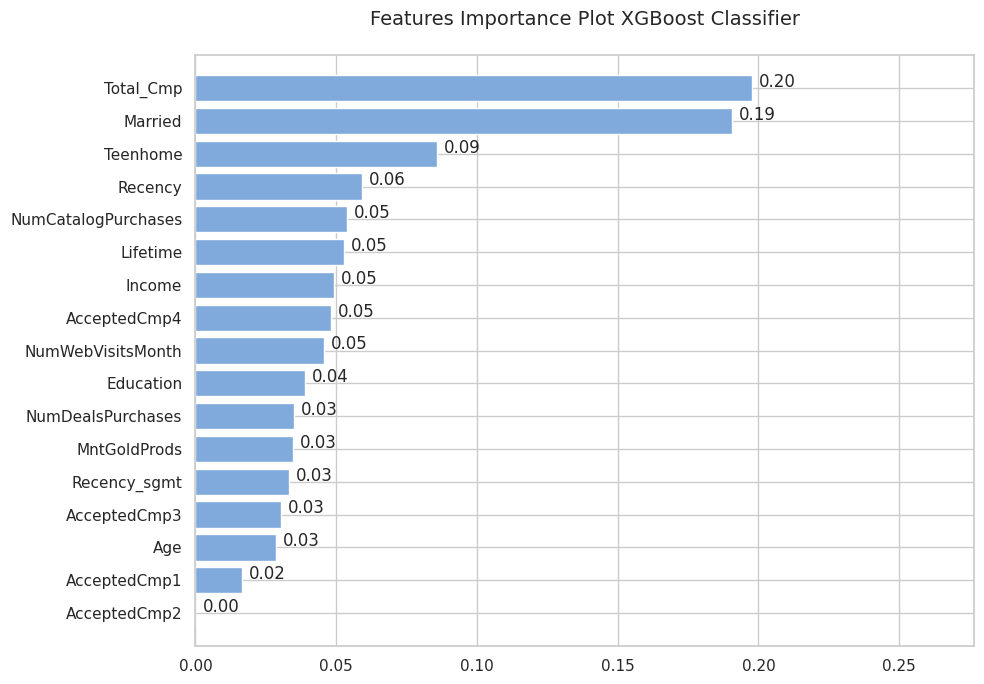

In [112]:
# Visualisierung der Feature-importance des XGBoost-Klassifizierungsmodells
feature_importance_plot(xgb_model, "XGBoost Classifier")

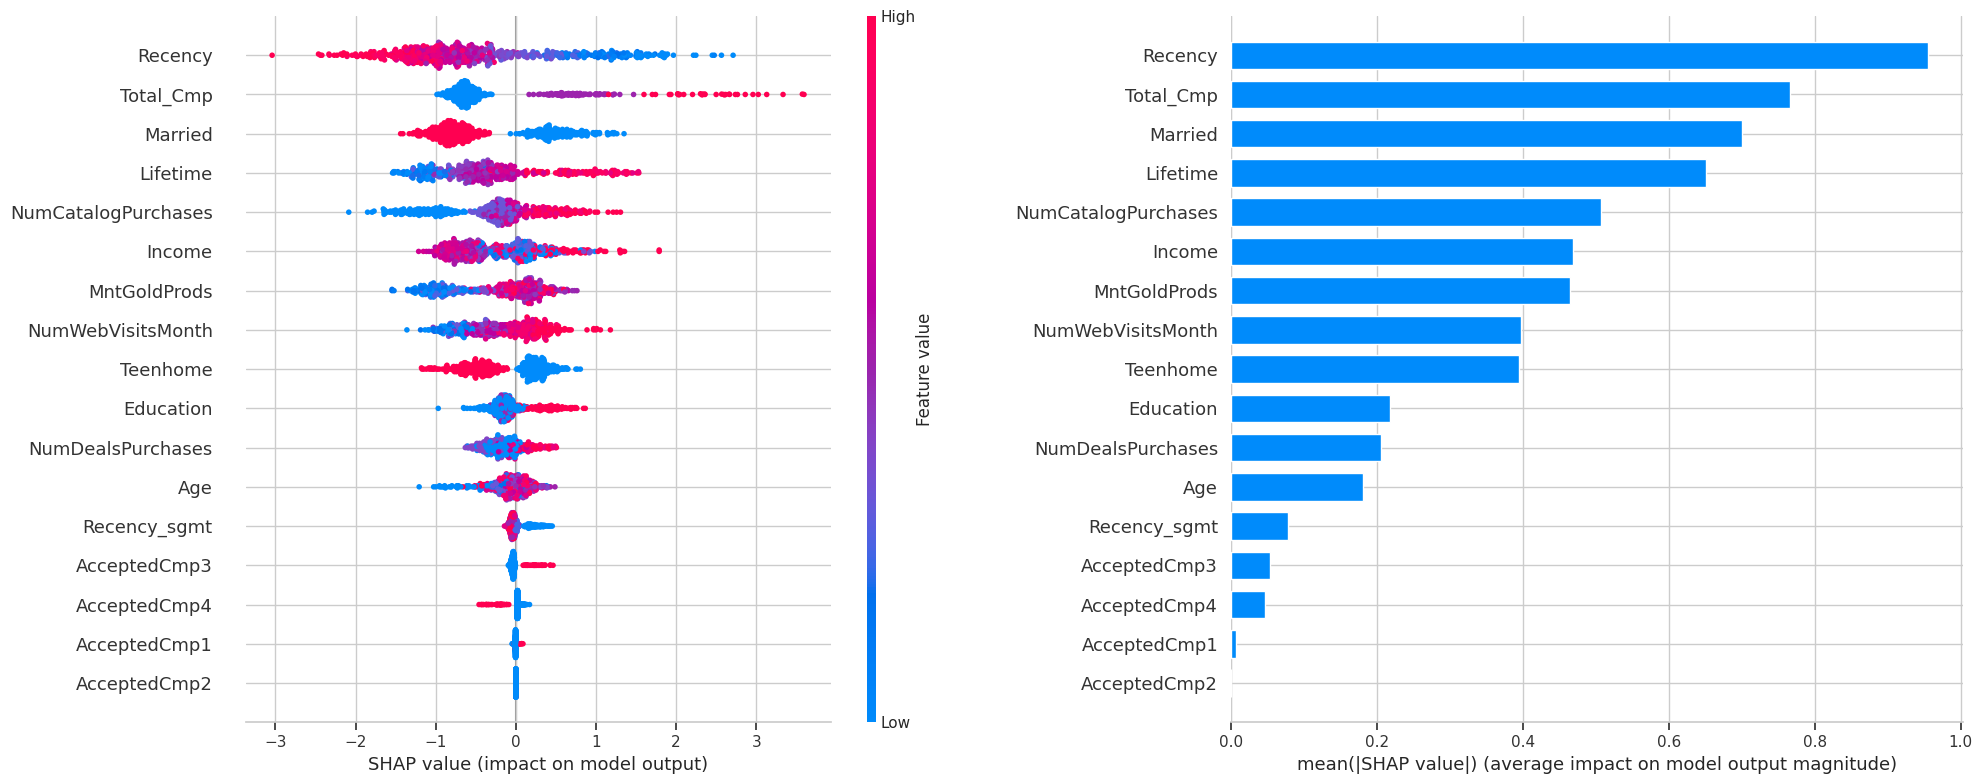

In [113]:
# Durchführung einer SHAP-Analyse für das XGBoost-Klassifizierungsmodell mit dem Testdatensatz
shap_plot(xgb_model, "XGBoost Classifier", X_test)

### **Support Vector Machine**


In [114]:
from sklearn.svm import SVC

# Trainieren des SVM-Modells mit RBF-Kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42).fit(X_train, y_train)

# Ausgabe des trainierten Modells
print(svm_model)

# Bewertung des SVM-Modells
eval_classification(svm_model, "Support Vector Machine")

SVC(probability=True, random_state=42)


Classification Report Training Model (Support Vector Machine):

Accuracy = 0.887
Precision = 0.836
Recall = 0.824
F0.5 Score = 0.834
F1 Score = 0.83
Cross Val F1 (k=5) = 0.536
ROC AUC = 0.954
Cross Val ROC AUC (k=5) = 0.928

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1428
           1       0.84      0.82      0.83       714

    accuracy                           0.89      2142
   macro avg       0.87      0.87      0.87      2142
weighted avg       0.89      0.89      0.89      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 588, FP = 115, TN = 1313, FN = 126
Predictly Correct = 1901
Predictly Wrong = 241 



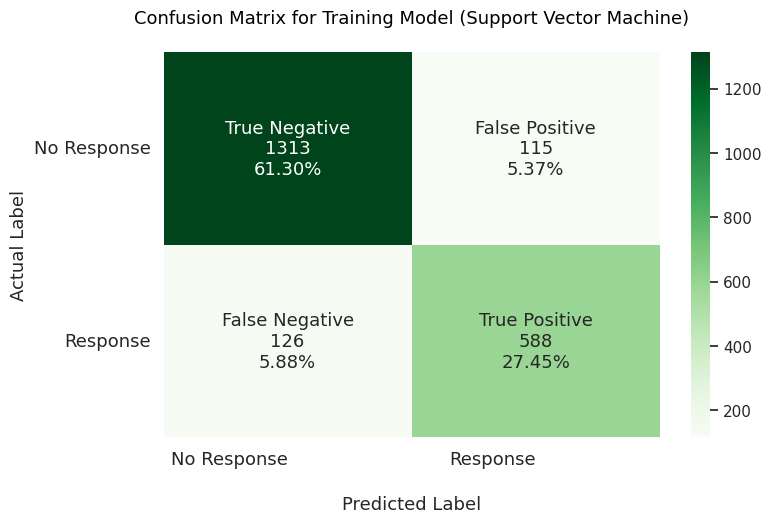

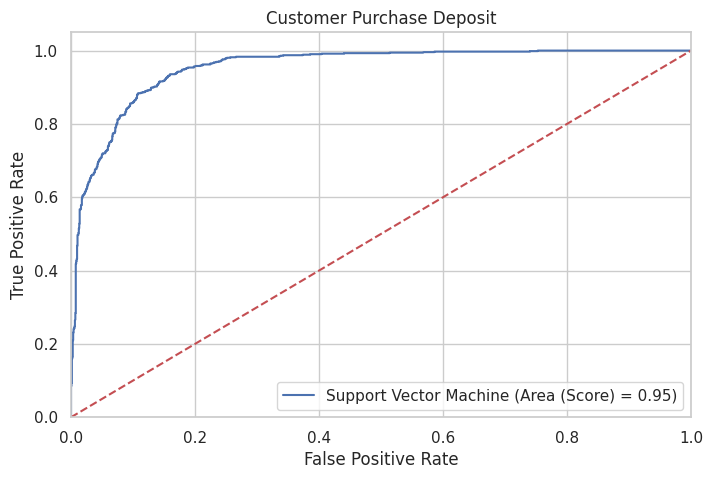

In [115]:
# Bewertung des SVM-Modells auf den Trainingsdaten
model_eval_train(svm_model, "Support Vector Machine", X_train, y_train)

#### **Performance of Testing Model**

Classification Report Testing Model (Support Vector Machine):

Accuracy = 0.85
Precision = 0.495
Recall = 0.602
F0.5 Score = 0.513
F1 Score = 0.543
Cross Val F1 (k=5) = 0.436
ROC AUC = 0.888
Cross Val ROC AUC (k=5) = 0.883

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       477
           1       0.50      0.60      0.54        83

    accuracy                           0.85       560
   macro avg       0.71      0.75      0.73       560
weighted avg       0.86      0.85      0.86       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 50, FP = 51, TN = 426, FN = 33
Predictly Correct = 476
Predictly Wrong = 84 



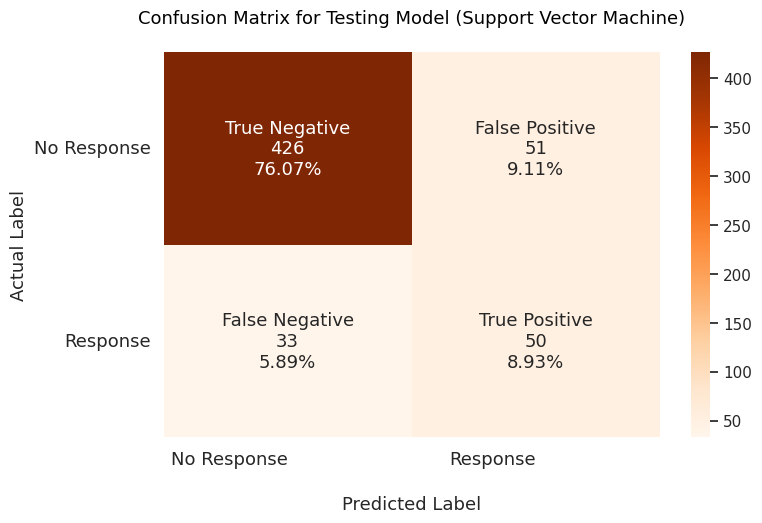

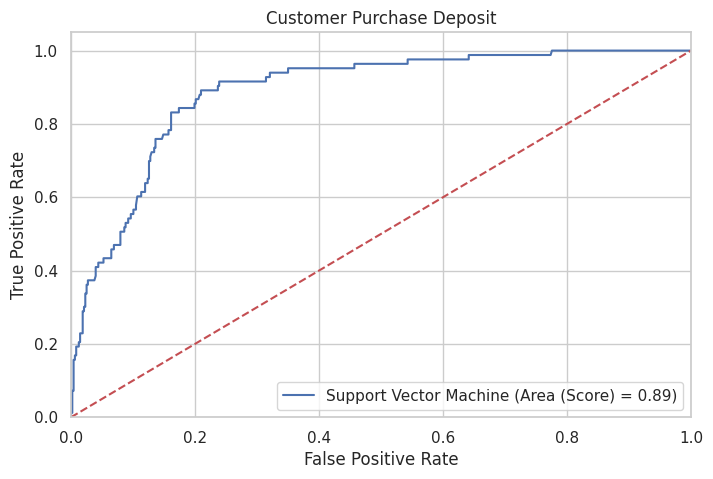

In [116]:
# Bewertung des SVM-Modells auf den Testdaten
model_eval_test(svm_model, "Support Vector Machine", X_test, y_test)

In [117]:
# Berechnung der Trainingsgenauigkeit des SVM-Modells
acc_svm_train=round(svm_model.score(X_train,y_train)*100,2)

# Berechnung der Testgenauigkeit des SVM-Modells
acc_svm_test=round(svm_model.score(X_test,y_test)*100,2)

# Ausgabe der Trainings- und Testgenauigkeit
print("Training Accuracy: {} %".format(acc_svm_train))
print("Test Accuracy: {} %".format(acc_svm_test))

Training Accuracy: 88.75 %
Test Accuracy: 85.0 %


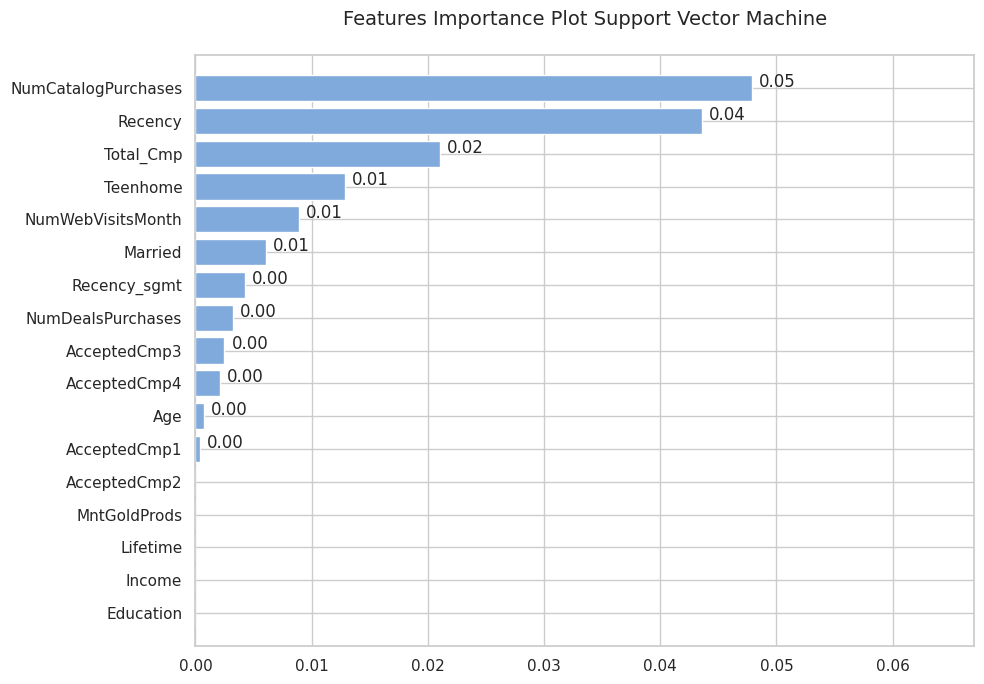

In [118]:
# Visualisierung der Feature-importance für das SVM-Modell
feature_importance_plot(svm_model, "Support Vector Machine", X_train)

### **MLP Classifier**







In [119]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint

# Definition des MLPClassifier
mlp_model1 = MLPClassifier(random_state=42)

# Definition des Parameterbereichs für die zufällige Suche
param_dist = {
    'hidden_layer_sizes': [(x,) for x in randint.rvs(10, 100, size=10)],  # 10 random values for size of layer
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.001),  # Continuous distribution over alpha
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': uniform(0.001, 0.01),  # Continuous distribution over learning_rate_init
    'batch_size': randint.rvs(64, 256, size=10)  # 10 random values for batch size between 64 and 256
}

# Definition der Kreuzvalidierungsstrategie
skf = StratifiedKFold(n_splits=5)

# Konfiguration der RandomizedSearchCV
random_search = RandomizedSearchCV(mlp_model1, param_distributions=param_dist, n_iter=100, cv=skf, verbose=2, random_state=42, n_jobs=-1)

# Durchführung der zufälligen Suche
random_search.fit(X_train, y_train)

# Auswahl des besten Modells
mlp_model = random_search.best_estimator_

# Ausgabe der besten Parameter
print("Best parameters found:\n", random_search.best_params_)

# Bewertung des MLP-Modells
eval_classification(mlp_model, "MLP Classifier")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0004601906414112629, 'batch_size': 175, 'hidden_layer_sizes': (88,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.008699935530986108, 'solver': 'adam'}


Classification Report Training Model (MLP Classifier):

Accuracy = 0.997
Precision = 0.999
Recall = 0.992
F0.5 Score = 0.997
F1 Score = 0.995
Cross Val F1 (k=5) = 0.972
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1428
           1       1.00      0.99      1.00       714

    accuracy                           1.00      2142
   macro avg       1.00      1.00      1.00      2142
weighted avg       1.00      1.00      1.00      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 708, FP = 1, TN = 1427, FN = 6
Predictly Correct = 2135
Predictly Wrong = 7 



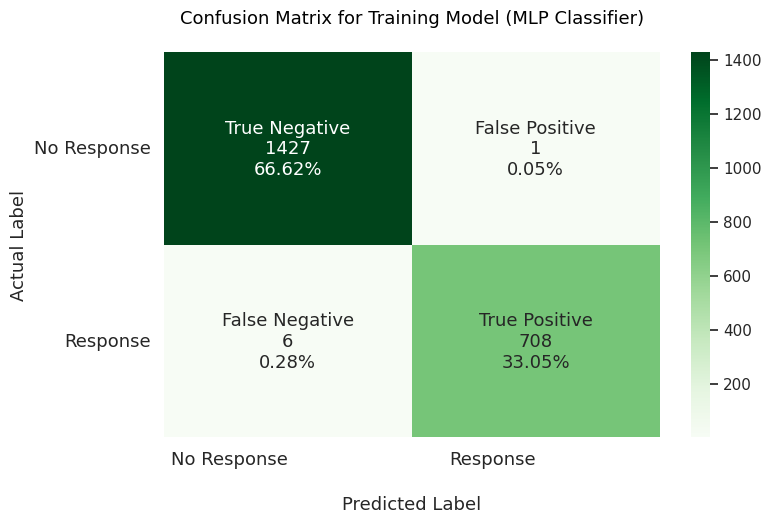

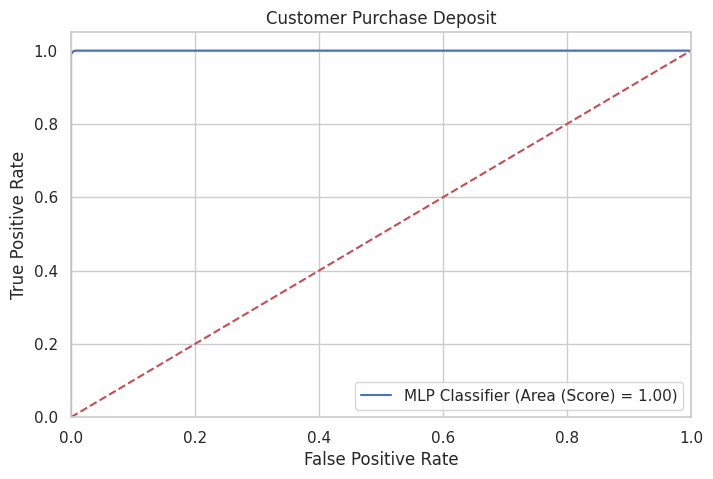

In [120]:
# Bewertung des MLP-Klassifizierungsmodells auf den Trainingsdaten
model_eval_train(mlp_model, "MLP Classifier", X_train, y_train)

Classification Report Testing Model (MLP Classifier):

Accuracy = 0.862
Precision = 0.534
Recall = 0.566
F0.5 Score = 0.54
F1 Score = 0.55
Cross Val F1 (k=5) = 0.561
ROC AUC = 0.853
Cross Val ROC AUC (k=5) = 0.873

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       477
           1       0.53      0.57      0.55        83

    accuracy                           0.86       560
   macro avg       0.73      0.74      0.73       560
weighted avg       0.87      0.86      0.86       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 47, FP = 41, TN = 436, FN = 36
Predictly Correct = 483
Predictly Wrong = 77 



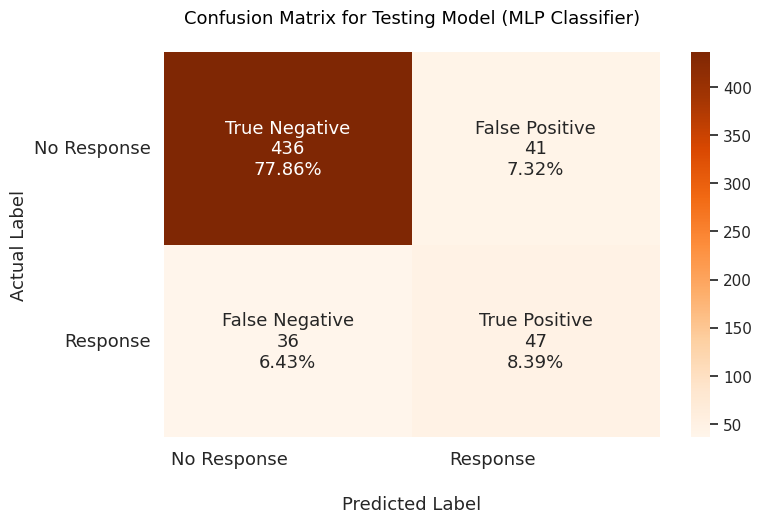

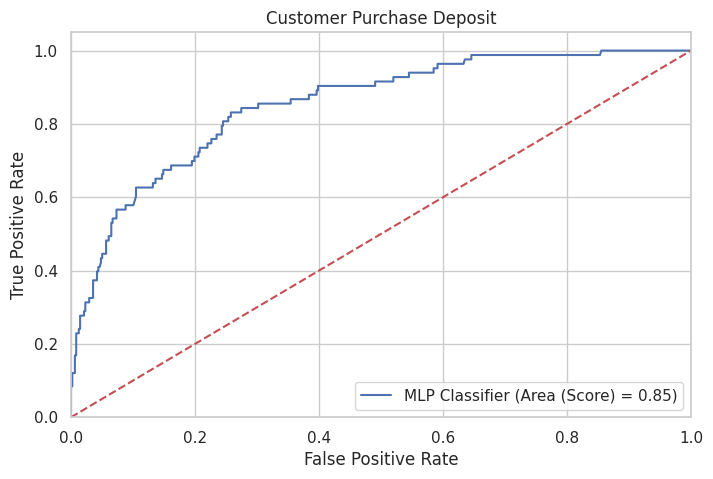

In [121]:
# Bewertung des MLP-Klassifizierungsmodells auf den Testdaten
model_eval_test(mlp_model, "MLP Classifier", X_test, y_test)

In [122]:
# Berechnung der Trainingsgenauigkeit des MLP-Modells
acc_mlp_train=round(mlp_model.score(X_train,y_train)*100,2)

# Berechnung der Testgenauigkeit des MLP-Modells
acc_mlp_test=round(mlp_model.score(X_test,y_test)*100,2)

# Ausgabe der Trainings- und Testgenauigkeit
print("Training Accuracy: {} %".format(acc_mlp_train))
print("Test Accuracy: {} %".format(acc_mlp_test))

Training Accuracy: 99.67 %
Test Accuracy: 86.25 %


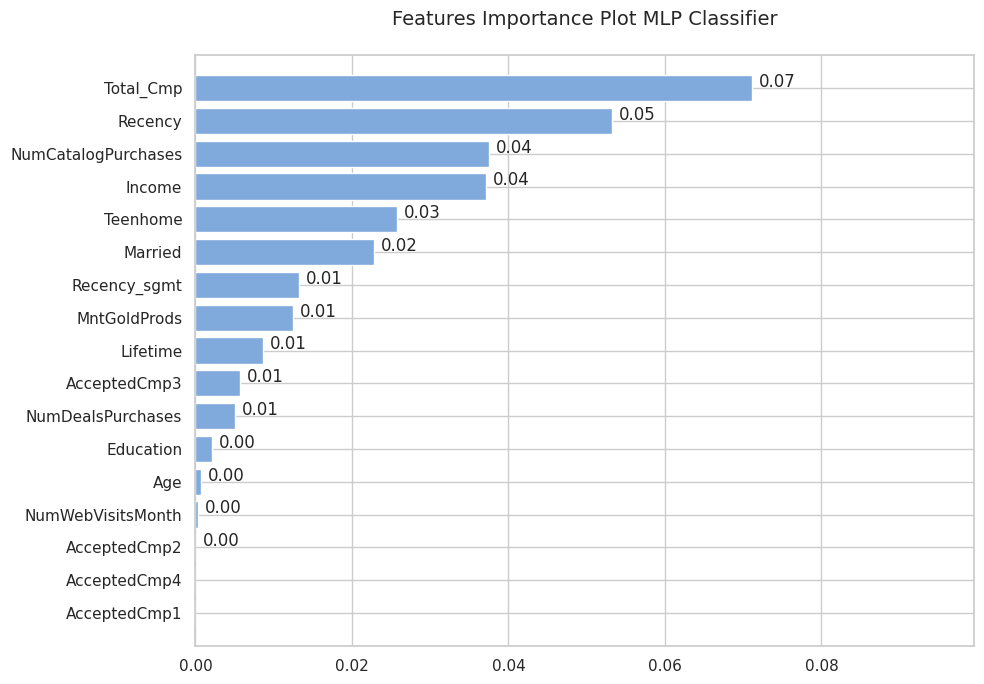

In [123]:
# Visualisierung der Feature-importance für MLP-Classifier-Modell
feature_importance_plot(mlp_model, "MLP Classifier", X_train)

## **Vergleich und Bewertung von Modellen**

In [124]:
# Erstellung einer DataFrame zur Zusammenfassung der Testergebnisse verschiedener Modelle
results_test = pd.DataFrame({
    'Model (Test)': test_modelname_list,   # Namen der Modelle
    'Accuracy': test_accuracy_list,        # Genauigkeit der Modelle
    'Precision': test_precision_list,      # Präzision der Modelle
    'Recall': test_recall_list,            # Recall der Modelle
    'F1 Score': test_f1_score_list,        # F1-Score der Modelle
    'Cross Val F1 (k=5)': test_cross_val_f1_list, # Kreuzvalidierter F1-Score
    'ROC AUC': test_roc_auc_score_list,    # ROC AUC-Werte der Modelle
    'Cross Val ROC AUC (k=5)': test_cross_val_rocauc_list  # Kreuzvalidierter ROC AUC-Score
})

# Entfernen von Duplikaten, falls vorhanden
results_test.drop_duplicates(inplace = True)

# Sortieren der Ergebnisse nach Präzision und Recall
results_test = results_test.sort_values(by=['Precision', 'Recall'], ascending=False).reset_index(drop = True)

# visuelle Darstellung
results_test.style.format(precision=3).background_gradient(cmap='Greens')